In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read MA PPE data
df = pd.read_csv('covid_19_region.csv', parse_dates=['Time'])
df.drop(['Total Persons Tested','Percent Positivity','Deaths'], axis=1, inplace=True)
df = df.loc[df['Region']!='State Agency'].dropna(how='all')
df

Time                 Region  N95s/KN95s      Masks     Gowns  \
0   2020-04-29  Central Massachusetts    138350.0   263767.0   43293.0   
1   2020-04-30  Central Massachusetts    146820.0   269267.0   43573.0   
2   2020-05-01  Central Massachusetts    157800.0   276767.0   43838.0   
3   2020-05-02  Central Massachusetts    161960.0   277517.0   44658.0   
4   2020-05-03  Central Massachusetts    161960.0   277517.0   44658.0   
..         ...                    ...         ...        ...       ...   
291 2020-06-24          Massachusetts   4388525.0  3538480.0  666890.0   
292 2020-07-01          Massachusetts   4409365.0  4007230.0  678510.0   
293 2020-07-08          Massachusetts   4437140.0  4041230.0  691495.0   
294 2020-07-15          Massachusetts   4530795.0  4689430.0  705322.0   
295 2020-07-22          Massachusetts   7447255.0  6733830.0  714422.0   

        Gloves  Ventilators  Confirmed Cases  Hospitalized Total  \
0     454250.0         79.0           5363.0               316.0   
1     457450.0         79.0              NaN               334.0   
2     472050.0         79.0              NaN               329.0   
3     480450.0         79.0              NaN               321.0   
4     480450.0         79.0              NaN               320.0   
..         ...          ...              ...                 ...   
291  8271946.0        679.0         102762.0                 NaN   
292  8867546.0        679.0         103858.0                 NaN   
293  8922946.0        679.0         104961.0                 NaN   
294  9469546.0        679.0         106128.0                 NaN   
295  9590446.0        679.0         107413.0                 NaN   

     Hospitalized ICU  
0                95.0  
1                95.0  
2                93.0  
3                93.0  
4                89.0  
..                ...  
291               NaN  
292               NaN  
293               NaN  
294               NaN  
295               NaN  

[259 rows x 10 columns]

# Note:
## This notebook is generalized in three parts for each region to analyze PPE distribution vs confirmed cases.
### 1: Figures of absolue value of cumulative PPE data vs cumulative confirmed cases data. 
### 2: Figures of ratios of PPE data to confirmed cases. (See comments for 6 different ratios)
### 3: Figures of regression and results.


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Summary
### 1: This data set is from DPH and MEMA. The PPEs are distributed to those who will have a supply shortage within the next 5 days and are not able to sourcethe material through their normal supply chain. This data set may not show the entire pucture of PPE supply in Mass.
### 2: At first, Feds gave Mass. the least amount of PPE but sent large shipments to states with smaller population and far few cases. (https://www.wbur.org/news/2020/07/23/fema-masks-ppe-massachusetts-coronavirus)
### 3: There is a huge increase on July 22 for N95s/KN95s which may be caused by large supplys from FEMA.(Not sure) 
### 4: There is a linear relationship between cumulative gowns/gloves and cumulative confirmed cases based on the data we have. If we ignore the data from 7/22/2020, the relationship also exists between cumulative N95s/KN95s/Masks and cumulative confirmed cases. 
...


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# PPE Distribution vs Confirmed Cases
## Southeastern Massachusetts

Time                      Region  N95s/KN95s      Masks     Gowns  \
148 2020-04-29  Southeastern Massachusetts    234696.0   408835.0   66317.0   
155 2020-05-06  Southeastern Massachusetts    271607.0   494885.0   80542.0   
162 2020-05-13  Southeastern Massachusetts    294853.0   579135.0   93570.0   
169 2020-05-20  Southeastern Massachusetts    306789.0   610735.0  101149.0   
176 2020-05-27  Southeastern Massachusetts    354094.0   643835.0  121174.0   
177 2020-06-03  Southeastern Massachusetts    371135.0   674335.0  127784.0   
178 2020-06-10  Southeastern Massachusetts    377062.0   691835.0  131684.0   
179 2020-06-17  Southeastern Massachusetts    378627.0   697785.0  134614.0   
180 2020-06-24  Southeastern Massachusetts    381785.0   705885.0  138104.0   
181 2020-07-01  Southeastern Massachusetts    383545.0   705885.0  139104.0   
182 2020-07-08  Southeastern Massachusetts    388295.0   713385.0  140304.0   
183 2020-07-15  Southeastern Massachusetts    402660.0   755335.0  145104.0   
184 2020-07-22  Southeastern Massachusetts    627550.0  1085285.0  146004.0   

        Gloves  Ventilators  Confirmed Cases  Hospitalized Total  \
148   686220.0         79.0           9446.0               466.0   
155   853420.0         79.0          11616.0               523.0   
162  1020308.0         79.0          13243.0               500.0   
169  1111008.0         79.0          14953.0               352.0   
176  1198208.0         79.0          16026.0               311.0   
177  1338408.0         79.0          16832.0               344.0   
178  1369208.0         79.0          17297.0               282.0   
179  1370008.0         79.0          17597.0               157.0   
180  1436408.0         79.0          17770.0               191.0   
181  1453608.0         79.0          17965.0               155.0   
182  1471908.0         79.0          18123.0                79.0   
183  1519908.0         79.0          18280.0                93.0   
184  1536908.0         79.0          18501.0                81.0   

     Hospitalized ICU  N95s/KN95s %     Masks %     Gowns %    Gloves %  \
148              89.0     37.398773   37.670750   45.421358   44.649387   
155              91.0     43.280535   45.599543   55.164242   55.528373   
162              86.0     46.984782   53.362481   64.087285   66.387058   
169              72.0     48.886782   56.274158   69.278239   72.288517   
176              67.0     56.424827   59.324049   82.993617   77.962246   
177              62.0     59.140308   62.134370   87.520890   87.084458   
178              55.0     60.084774   63.746850   90.192050   89.088482   
179              30.0     60.334157   64.295093   92.198844   89.140534   
180              28.0     60.837383   65.041441   94.589189   93.460897   
181              15.0     61.117839   65.041441   95.274102   94.580027   
182              14.0     61.874751   65.732503   96.095997   95.770729   
183               9.0     64.163812   69.597848   99.383579   98.893883   
184               9.0    100.000000  100.000000  100.000000  100.000000   

     Ventilators %  
148          100.0  
155          100.0  
162          100.0  
169          100.0  
176          100.0  
177          100.0  
178          100.0  
179          100.0  
180          100.0  
181          100.0  
182          100.0  
183          100.0  
184          100.0

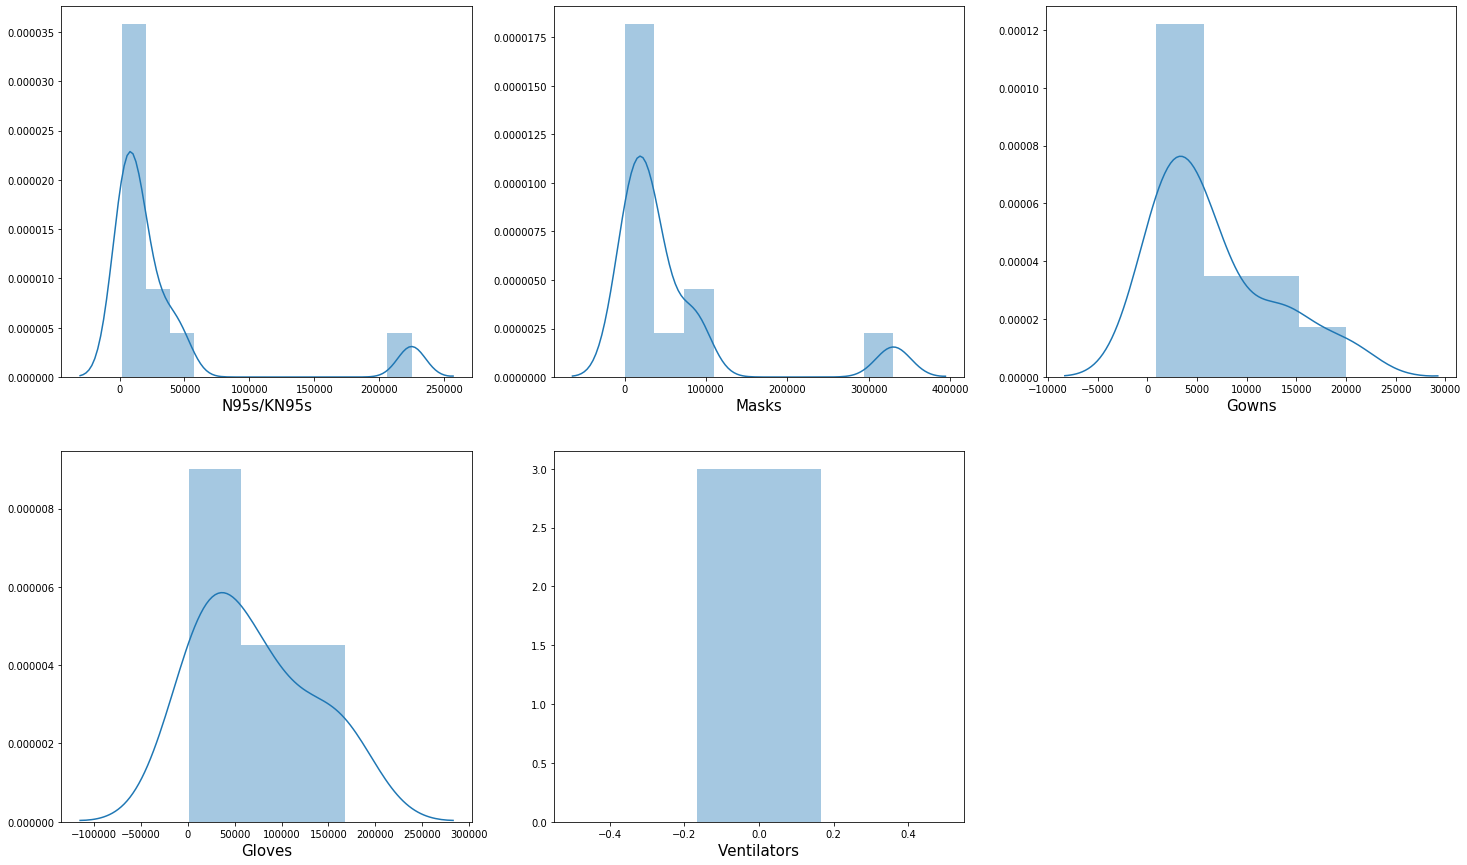

In [3]:
SM = df.loc[df['Region']=='Southeastern Massachusetts']
SM_CC = SM.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    SM_CC['{} %'.format(category)] = SM_CC[category]/SM_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(SM_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
SM_CC

Distplot of PPE Growth

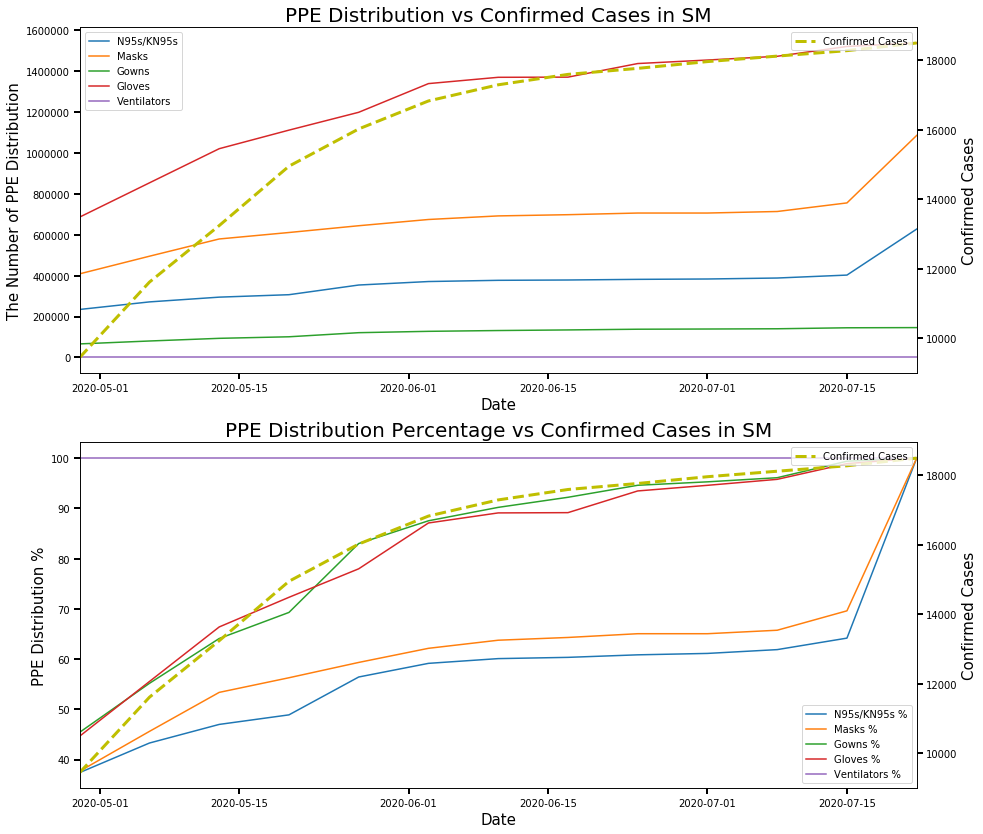

In [4]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=SM_CC)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in SM', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=SM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=SM_CC)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in SM', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=SM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    SM_CC['{} Ratio 1'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
SM_CC['Confirmed Cases(ma1)'] = SM_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
SM_CC.iloc[0,-1] = (6065 + 9446) / 2
for category in categories:
    SM_CC['{} Ratio 2'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
SM_CC['Confirmed Cases(ma2)'] = SM_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    SM_CC['{} Ratio 3'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
SM_CC['Confirmed Cases(ma3)'] = SM_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
SM_CC.iloc[0,-1] = (6065+9446+11616)/3
for category in categories:
    SM_CC['{} Ratio 4'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    SM_CC['{} Ratio 5'.format(category)] = SM_CC[category].diff()/SM_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    SM_CC['{} Ratio 6'.format(category)] = SM_CC[category].diff()/SM_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
# SM_CC

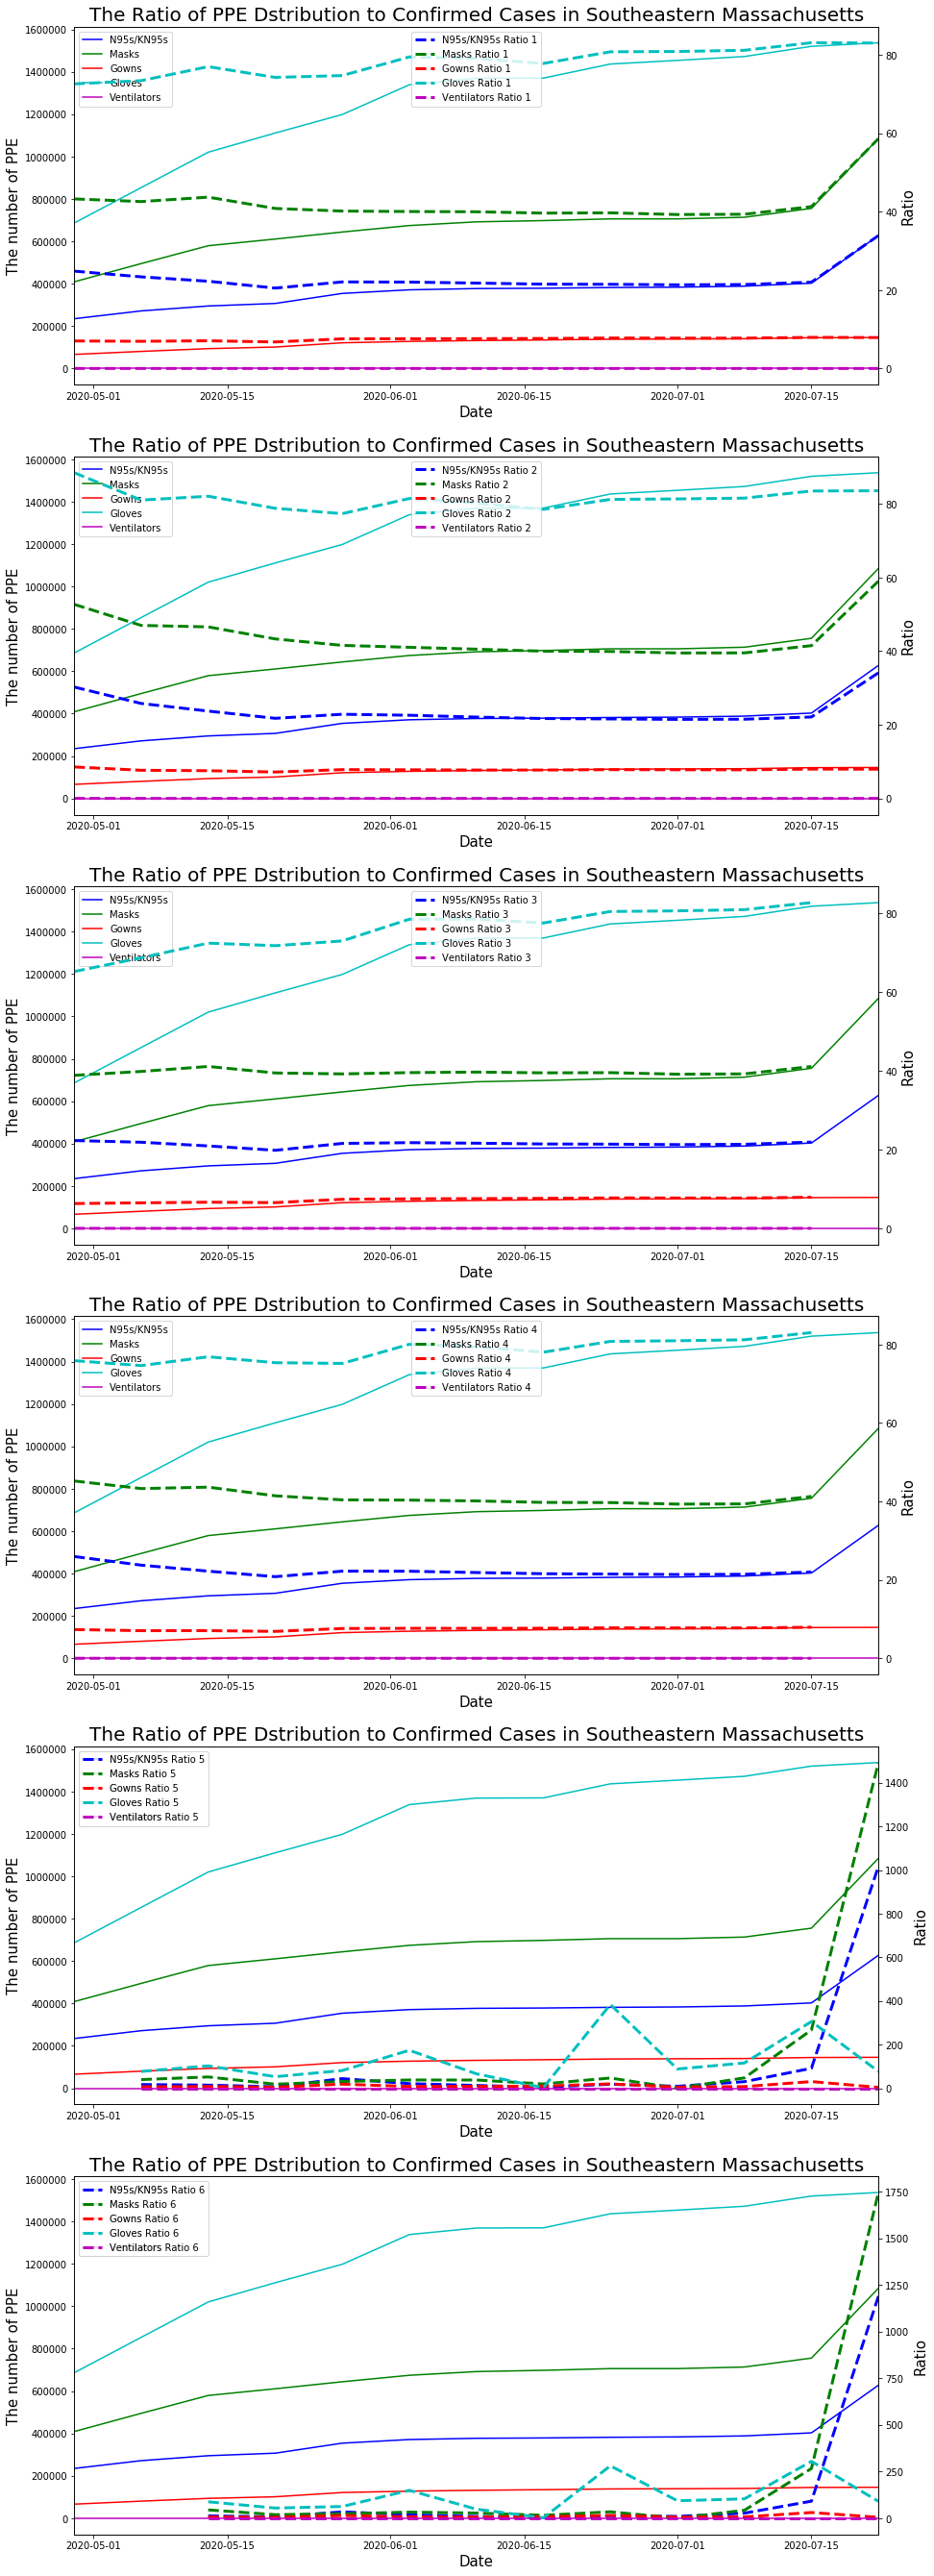

In [6]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=SM_CC, color=color[categories.index(category)])
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Southeastern Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=SM_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot(delta vs delta)')

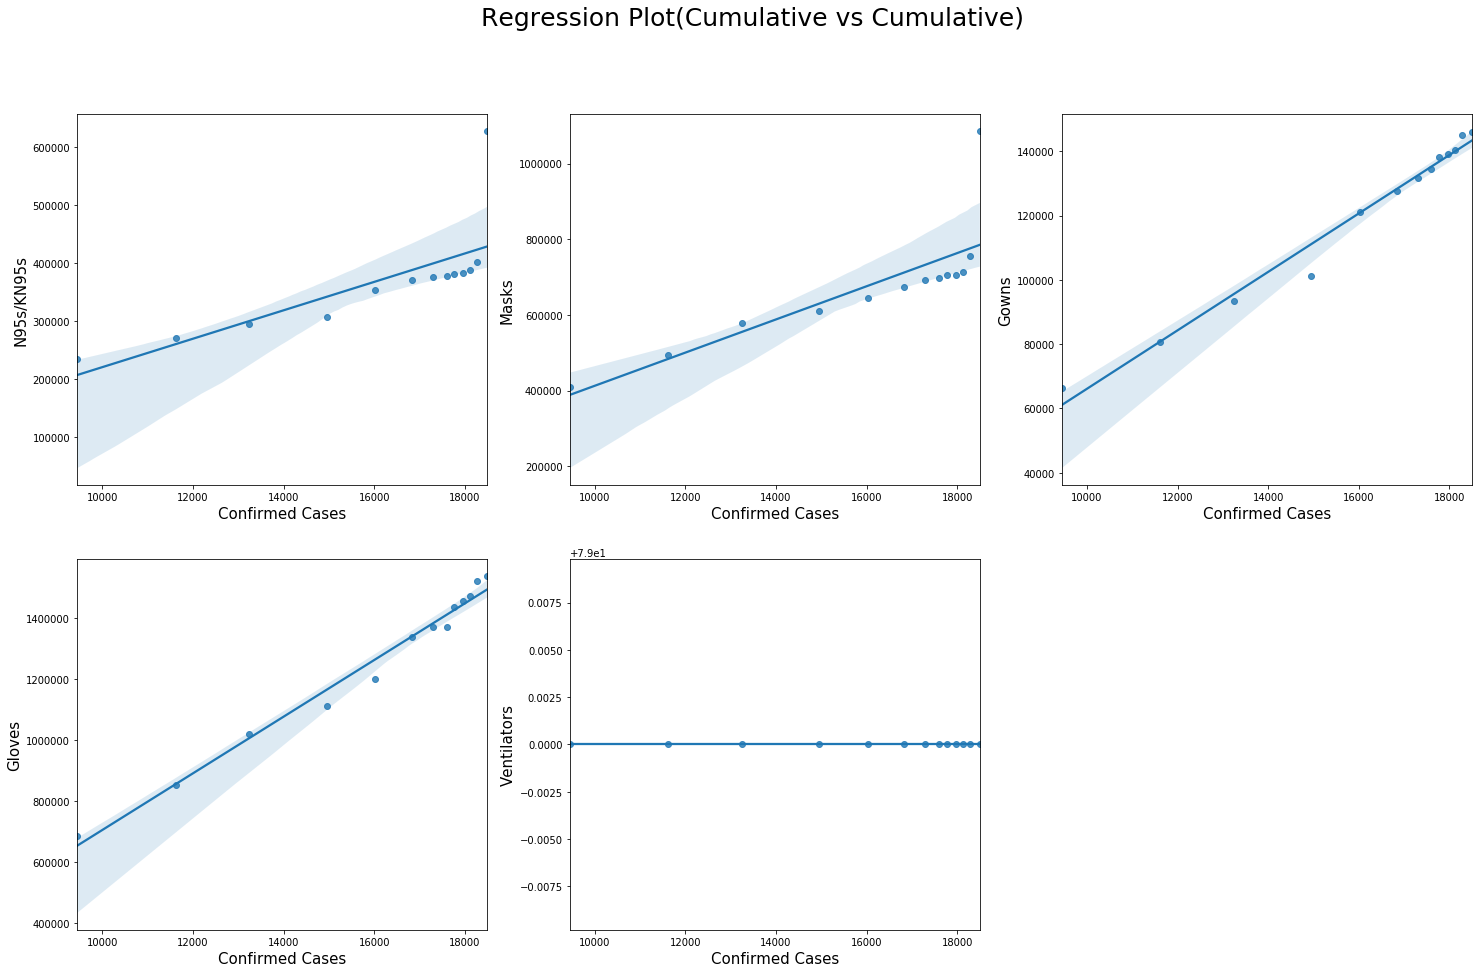

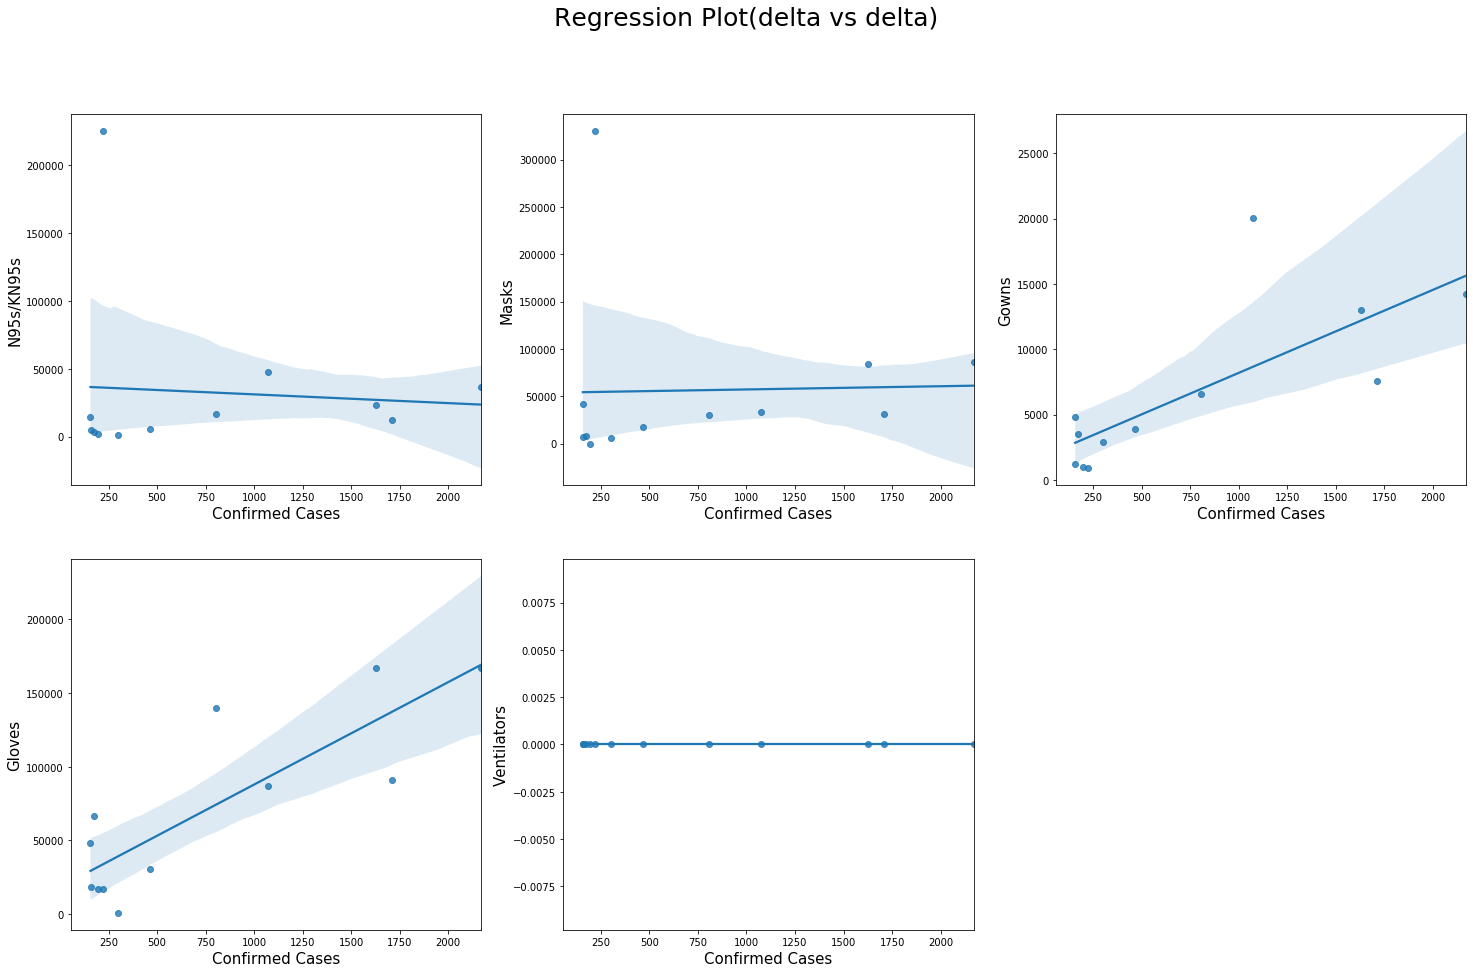

In [7]:
for category in categories:
    SM_CC['{} delta'.format(category)] = SM_CC[category].diff()
    SM_CC['Confirmed Cases delta'] = SM_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=SM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot(Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=SM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot(delta vs delta)', fontsize=25)



In [8]:
# Regression Analysis
import statsmodels.api as sm

Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = SM_CC[category]
    X[categories.index(category)] = SM_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     13.96
Date:                Fri, 24 Jul 2020   Prob (F-statistic):            0.00329
Time:                        23:42:54   Log-Likelihood:                -161.46
No. Observations:                  13   AIC:                             326.9
Df Residuals:                      11   BIC:                             328.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.416e+04   1.06e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Northeastern Massachusetts
### Northeastern Massachusetts is the region with the most confirmed cases number.

Time                      Region  N95s/KN95s     Masks    Gowns  \
111 2020-04-29  Northeastern Massachusetts    113720.0  226198.0  22974.0   
118 2020-05-06  Northeastern Massachusetts    144600.0  260413.0  27849.0   
125 2020-05-13  Northeastern Massachusetts    158983.0  297113.0  32024.0   
132 2020-05-20  Northeastern Massachusetts    164193.0  320263.0  35174.0   
139 2020-05-27  Northeastern Massachusetts    186775.0  339663.0  40604.0   
140 2020-06-03  Northeastern Massachusetts    193712.0  366013.0  42635.0   
141 2020-06-10  Northeastern Massachusetts    196071.0  375913.0  46315.0   
142 2020-06-17  Northeastern Massachusetts    198897.0  385913.0  49195.0   
143 2020-06-24  Northeastern Massachusetts    200936.0  390163.0  50520.0   
144 2020-07-01  Northeastern Massachusetts    201506.0  391063.0  50870.0   
145 2020-07-08  Northeastern Massachusetts    202526.0  392663.0  51370.0   
146 2020-07-15  Northeastern Massachusetts    207526.0  442163.0  52670.0   
147 2020-07-22  Northeastern Massachusetts    575436.0  857263.0  55670.0   

       Gloves  Ventilators  Confirmed Cases  Hospitalized Total  \
111  335932.0        117.0          14920.0               488.0   
118  427832.0        117.0          18056.0               489.0   
125  514032.0        117.0          20158.0               424.0   
132  559032.0        117.0          22088.0               349.0   
139  614332.0        117.0          23370.0               265.0   
140  688832.0        117.0          24334.0               196.0   
141  700832.0        117.0          25003.0               160.0   
142  703632.0        117.0          25424.0               137.0   
143  726632.0        117.0          25734.0               129.0   
144  730632.0        117.0          26022.0               103.0   
145  731132.0        117.0          26316.0                94.0   
146  739632.0        117.0          26659.0                65.0   
147  744632.0        117.0          26969.0                71.0   

     Hospitalized ICU  N95s/KN95s %     Masks %     Gowns %    Gloves %  \
111             108.0     19.762406   26.386068   41.268188   45.113828   
118             111.0     25.128772   30.377259   50.025148   57.455495   
125              99.0     27.628268   34.658325   57.524699   69.031683   
132              77.0     28.533668   37.358780   63.183043   75.074936   
139              56.0     32.457997   39.621796   72.936950   82.501424   
140              38.0     33.663518   42.695532   76.585234   92.506366   
141              34.0     34.073468   43.850370   83.195617   94.117900   
142              27.0     34.564574   45.016873   88.368960   94.493925   
143              22.0     34.918914   45.512637   90.749057   97.582699   
144              18.0     35.017969   45.617623   91.377762   98.119877   
145              16.0     35.195226   45.804263   92.275912   98.187024   
146               9.0     36.064132   51.578454   94.611101   99.328527   
147               9.0    100.000000  100.000000  100.000000  100.000000   

     Ventilators %  
111          100.0  
118          100.0  
125          100.0  
132          100.0  
139          100.0  
140          100.0  
141          100.0  
142          100.0  
143          100.0  
144          100.0  
145          100.0  
146          100.0  
147          100.0

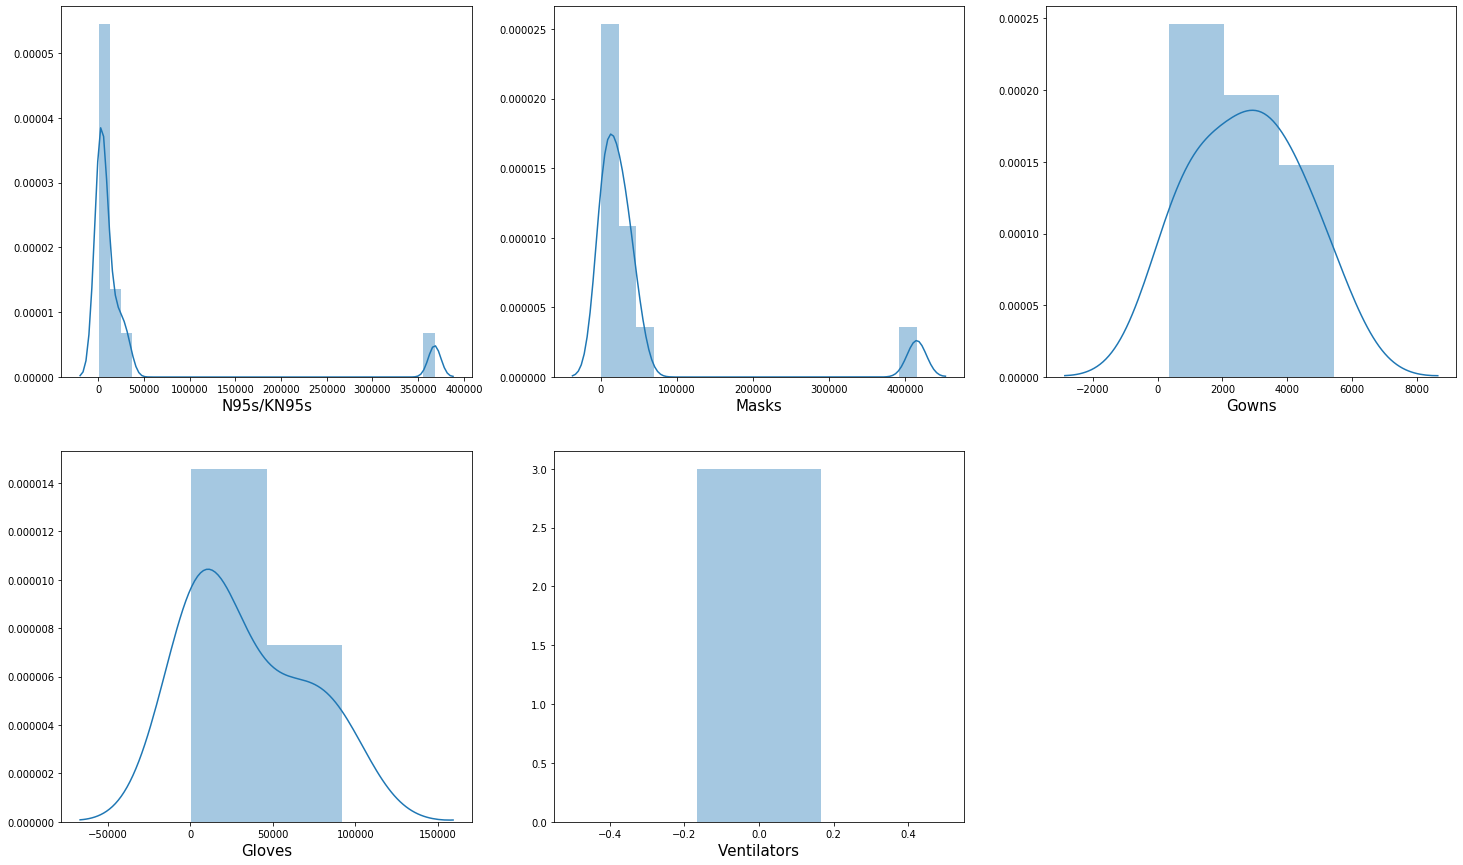

In [9]:
NM = df.loc[df['Region']=='Northeastern Massachusetts']
NM_CC = NM.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    NM_CC['{} %'.format(category)] = NM_CC[category]/NM_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(NM_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
NM_CC

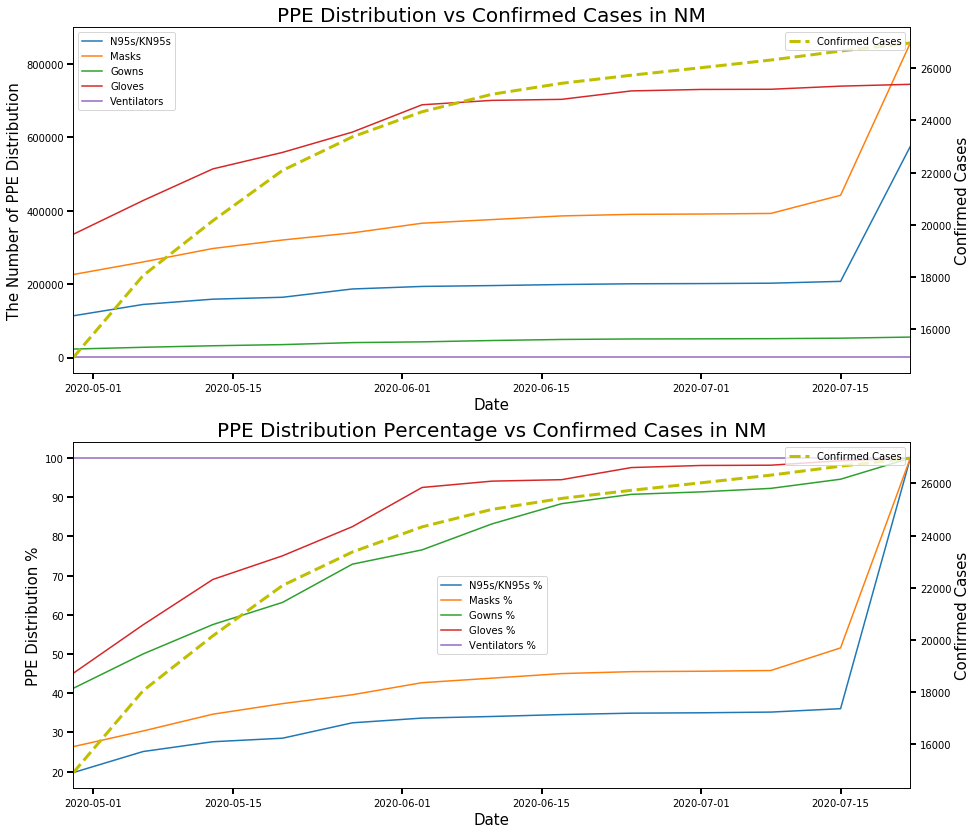

In [10]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=NM_CC)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in NM', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=NM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=NM_CC)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in NM', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=NM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [11]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    NM_CC['{} Ratio 1'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
NM_CC['Confirmed Cases(ma1)'] = NM_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
NM_CC.iloc[0,-1] = (10641+14920) / 2
for category in categories:
    NM_CC['{} Ratio 2'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
NM_CC['Confirmed Cases(ma2)'] = NM_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    NM_CC['{} Ratio 3'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
NM_CC['Confirmed Cases(ma3)'] = NM_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
NM_CC.iloc[0,-1] = (10641+14920+18056)/3
for category in categories:
    NM_CC['{} Ratio 4'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    NM_CC['{} Ratio 5'.format(category)] = NM_CC[category].diff()/NM_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    NM_CC['{} Ratio 6'.format(category)] = NM_CC[category].diff()/NM_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
NM_CC

Time                      Region  N95s/KN95s     Masks    Gowns  \
111 2020-04-29  Northeastern Massachusetts    113720.0  226198.0  22974.0   
118 2020-05-06  Northeastern Massachusetts    144600.0  260413.0  27849.0   
125 2020-05-13  Northeastern Massachusetts    158983.0  297113.0  32024.0   
132 2020-05-20  Northeastern Massachusetts    164193.0  320263.0  35174.0   
139 2020-05-27  Northeastern Massachusetts    186775.0  339663.0  40604.0   
140 2020-06-03  Northeastern Massachusetts    193712.0  366013.0  42635.0   
141 2020-06-10  Northeastern Massachusetts    196071.0  375913.0  46315.0   
142 2020-06-17  Northeastern Massachusetts    198897.0  385913.0  49195.0   
143 2020-06-24  Northeastern Massachusetts    200936.0  390163.0  50520.0   
144 2020-07-01  Northeastern Massachusetts    201506.0  391063.0  50870.0   
145 2020-07-08  Northeastern Massachusetts    202526.0  392663.0  51370.0   
146 2020-07-15  Northeastern Massachusetts    207526.0  442163.0  52670.0   
147 2020-07-22  Northeastern Massachusetts    575436.0  857263.0  55670.0   

       Gloves  Ventilators  Confirmed Cases  Hospitalized Total  \
111  335932.0        117.0          14920.0               488.0   
118  427832.0        117.0          18056.0               489.0   
125  514032.0        117.0          20158.0               424.0   
132  559032.0        117.0          22088.0               349.0   
139  614332.0        117.0          23370.0               265.0   
140  688832.0        117.0          24334.0               196.0   
141  700832.0        117.0          25003.0               160.0   
142  703632.0        117.0          25424.0               137.0   
143  726632.0        117.0          25734.0               129.0   
144  730632.0        117.0          26022.0               103.0   
145  731132.0        117.0          26316.0                94.0   
146  739632.0        117.0          26659.0                65.0   
147  744632.0        117.0          26969.0                71.0   

     Hospitalized ICU  N95s/KN95s %     Masks %     Gowns %    Gloves %  \
111             108.0     19.762406   26.386068   41.268188   45.113828   
118             111.0     25.128772   30.377259   50.025148   57.455495   
125              99.0     27.628268   34.658325   57.524699   69.031683   
132              77.0     28.533668   37.358780   63.183043   75.074936   
139              56.0     32.457997   39.621796   72.936950   82.501424   
140              38.0     33.663518   42.695532   76.585234   92.506366   
141              34.0     34.073468   43.850370   83.195617   94.117900   
142              27.0     34.564574   45.016873   88.368960   94.493925   
143              22.0     34.918914   45.512637   90.749057   97.582699   
144              18.0     35.017969   45.617623   91.377762   98.119877   
145              16.0     35.195226   45.804263   92.275912   98.187024   
146               9.0     36.064132   51.578454   94.611101   99.328527   
147               9.0    100.000000  100.000000  100.000000  100.000000   

     Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  Gowns Ratio 1  \
111          100.0            7.621984      15.160724       1.539812   
118          100.0            8.008418      14.422519       1.542368   
125          100.0            7.886844      14.739210       1.588650   
132          100.0            7.433584      14.499411       1.592448   
139          100.0            7.992084      14.534146       1.737441   
140          100.0            7.960549      15.041218       1.752075   
141          100.0            7.841899      15.034716       1.852378   
142          100.0            7.823199      15.179083       1.934983   
143          100.0            7.808191      15.161382       1.963162   
144          100.0            7.743678      15.028168       1.954884   
145          100.0            7.695926      14.921075       1.952044   
146          100.0            7.784463      16.585881       1.975693   
147  

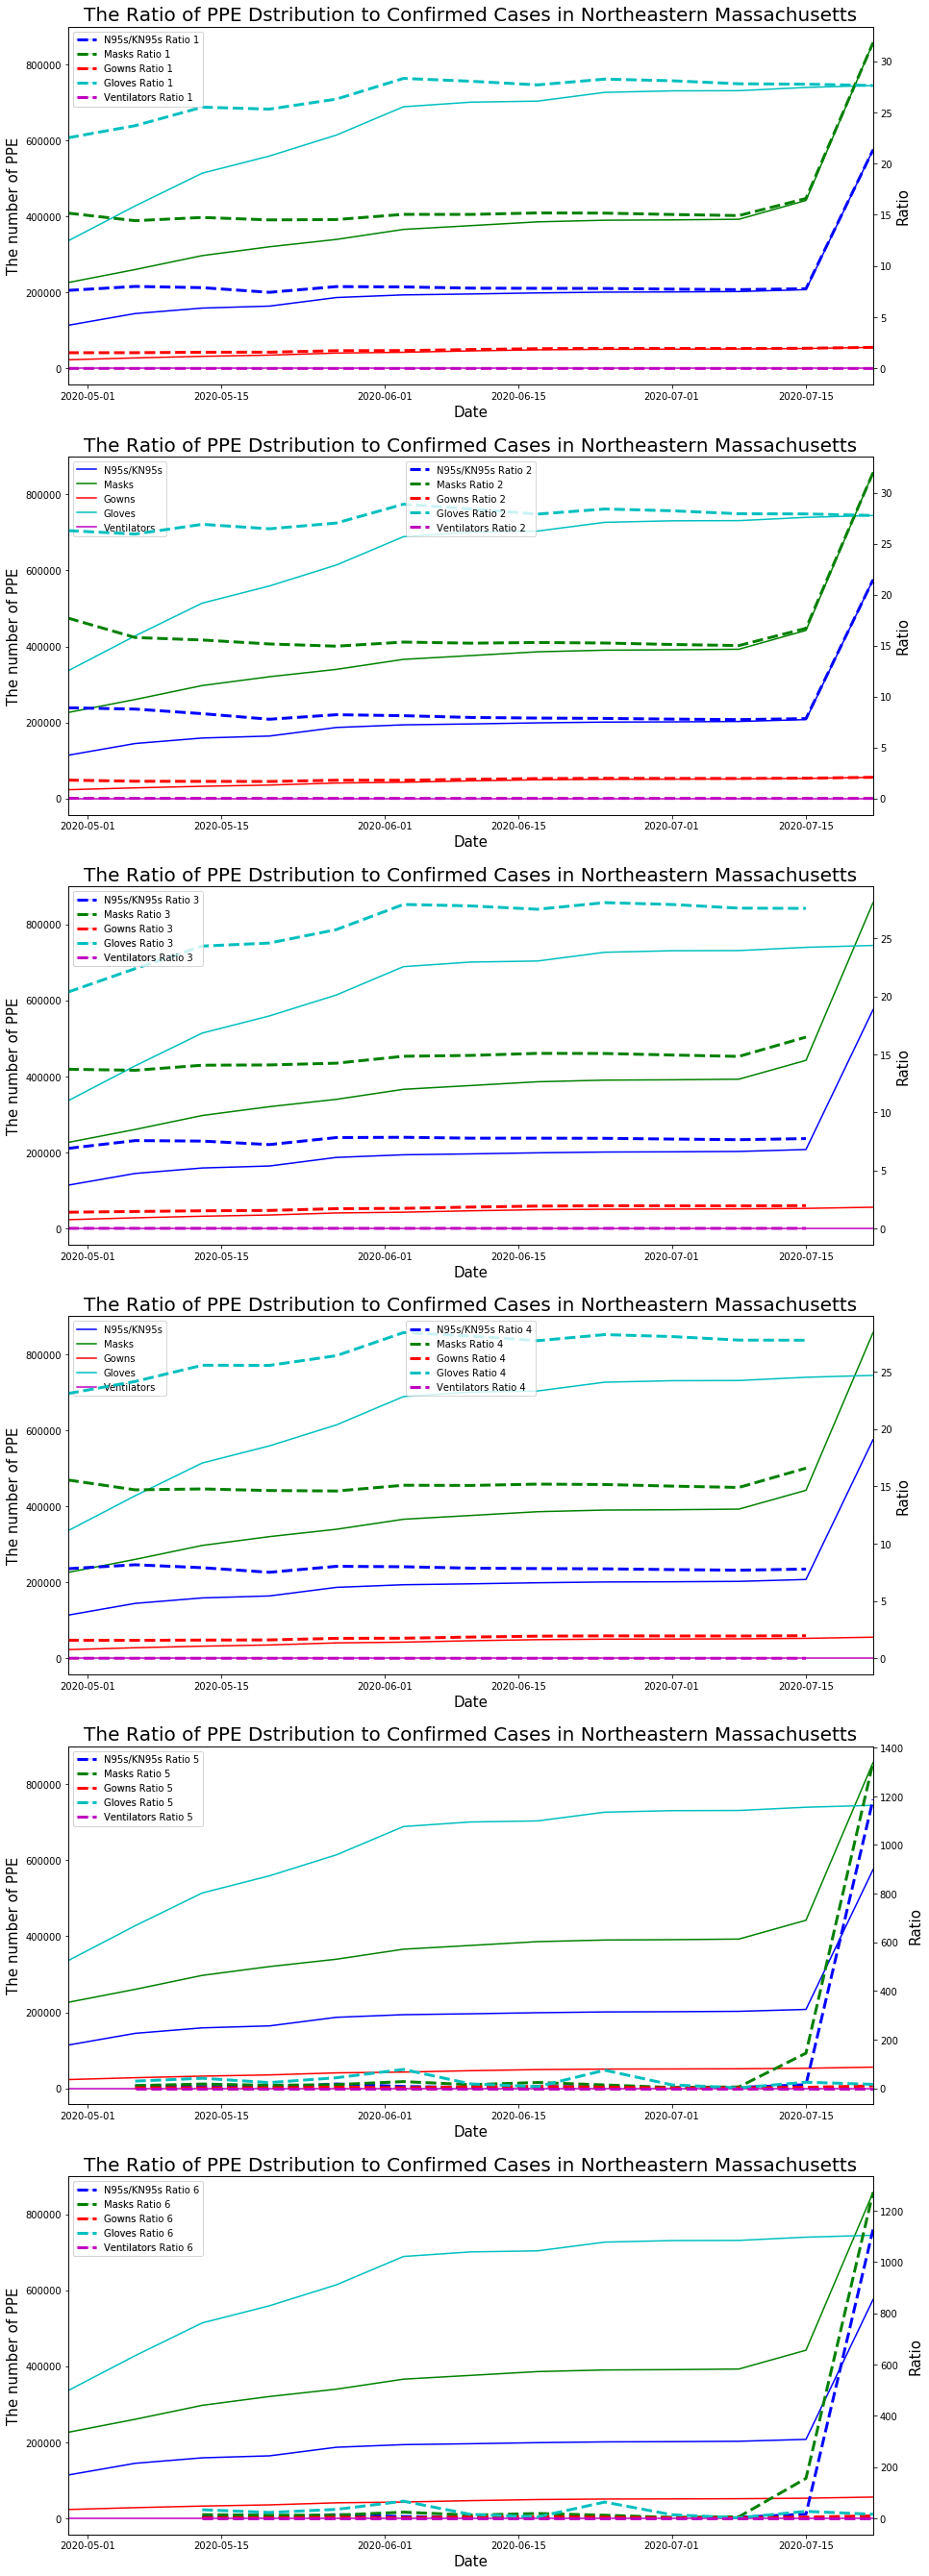

In [12]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=NM_CC, color=color[categories.index(category)])
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Northeastern Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=NM_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

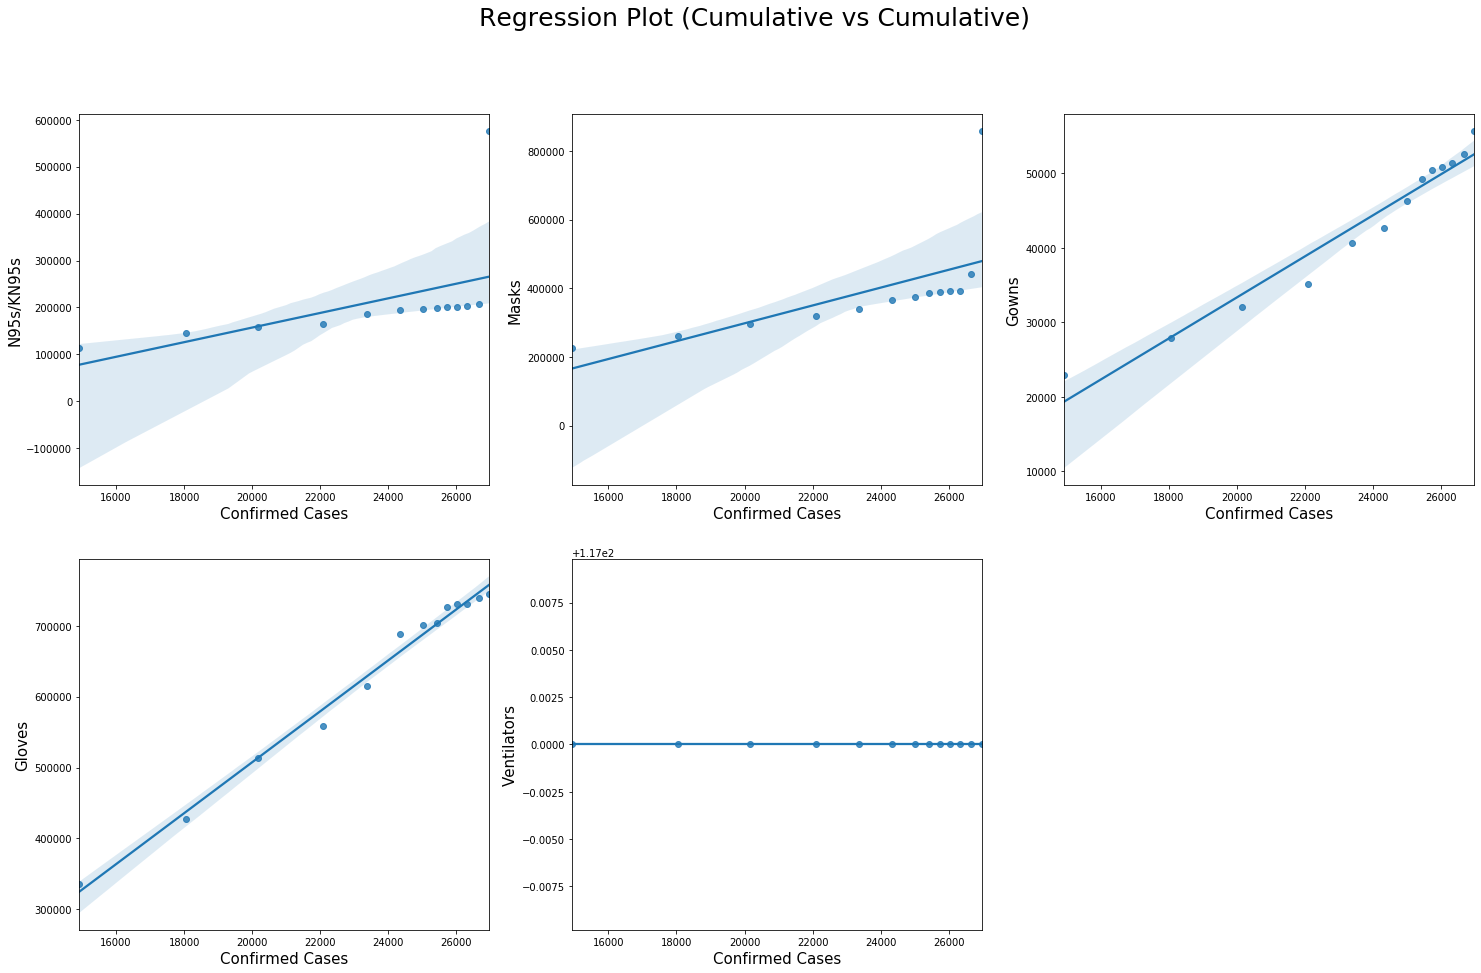

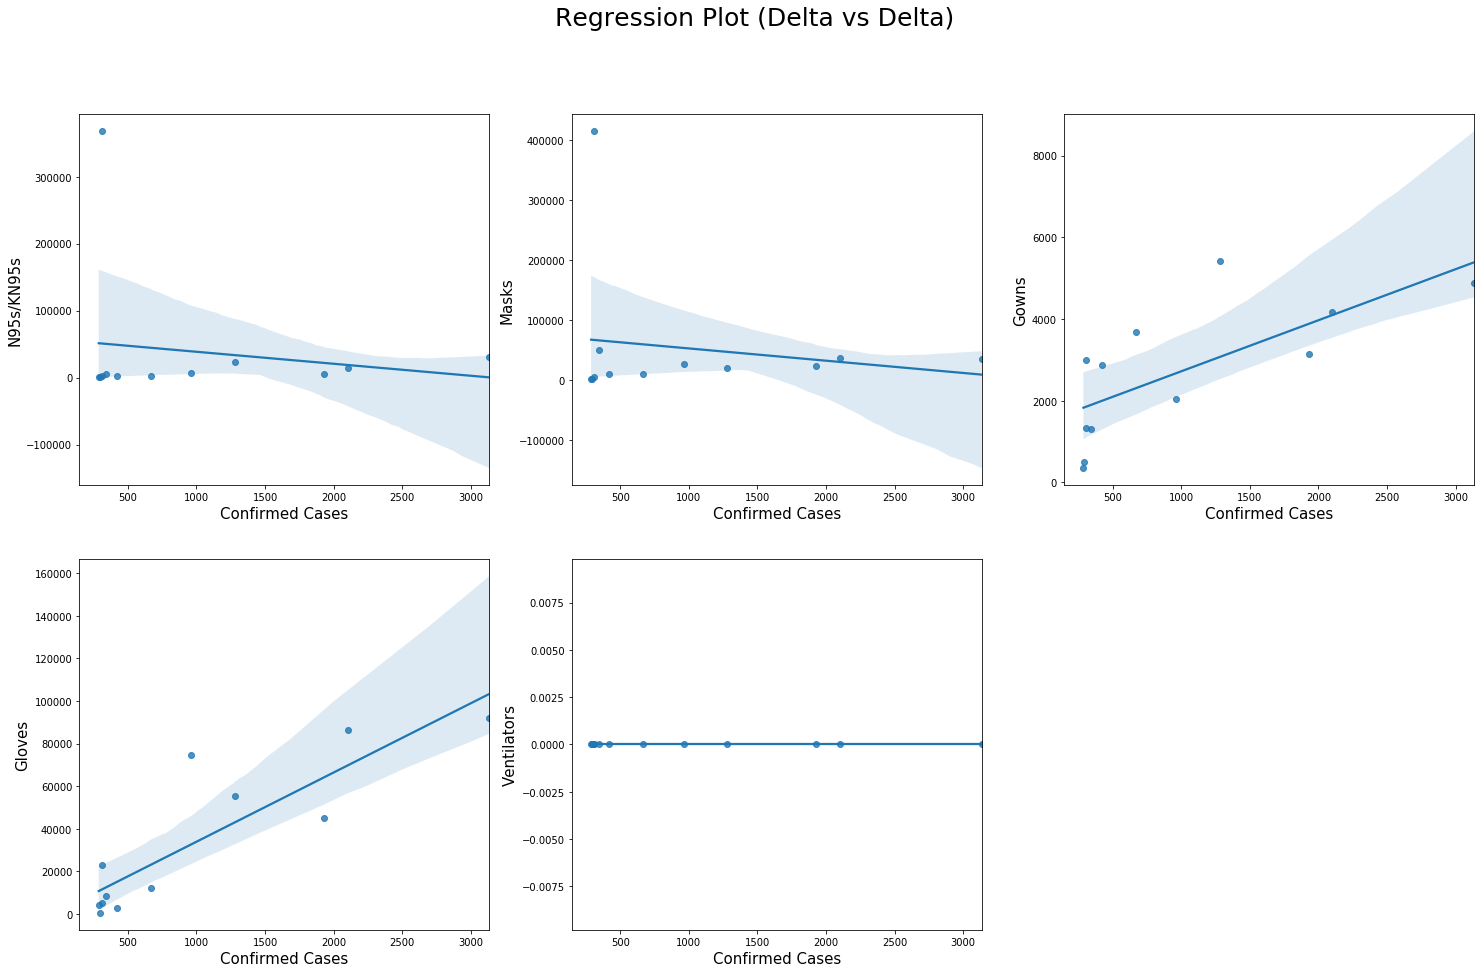

In [13]:
for category in categories:
    NM_CC['{} delta'.format(category)] = NM_CC[category].diff()
    NM_CC['Confirmed Cases delta'] = NM_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=NM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=NM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [14]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = NM_CC[category]
    X[categories.index(category)] = NM_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     3.882
Date:                Fri, 24 Jul 2020   Prob (F-statistic):             0.0745
Time:                        23:43:09   Log-Likelihood:                -167.21
No. Observations:                  13   AIC:                             338.4
Df Residuals:                      11   BIC:                             339.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.546e+05   1.88e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Metro West
### Metro West is the region with the most deaths number.

Time      Region  N95s/KN95s      Masks     Gowns     Gloves  \
74  2020-04-29  Metro West    212466.0   373412.0   50610.0   372180.0   
81  2020-05-06  Metro West    292073.0   475762.0   55812.0   592330.0   
88  2020-05-13  Metro West    336159.0   564732.0   71127.0   701630.0   
95  2020-05-20  Metro West    380619.0   610582.0   88237.0   870902.0   
102 2020-05-27  Metro West    449855.0   661482.0  128047.0   977602.0   
103 2020-06-03  Metro West    463396.0   687532.0  135759.0  1052774.0   
104 2020-06-10  Metro West    479836.0   722682.0  145989.0  1121074.0   
105 2020-06-17  Metro West    486648.0   724682.0  148709.0  1182274.0   
106 2020-06-24  Metro West    514245.0   730682.0  150139.0  1188574.0   
107 2020-07-01  Metro West    516985.0   737682.0  154039.0  1233574.0   
108 2020-07-08  Metro West    518680.0   737682.0  160914.0  1246574.0   
109 2020-07-15  Metro West    535320.0   783032.0  162441.0  1319174.0   
110 2020-07-22  Metro West    978560.0  1232432.0  163441.0  1319574.0   

     Ventilators  Confirmed Cases  Hospitalized Total  Hospitalized ICU  \
74         136.0          12601.0              1136.0             291.0   
81         136.0          14825.0              1010.0             253.0   
88         136.0          16491.0               853.0             209.0   
95         136.0          17755.0               672.0             173.0   
102        136.0          18580.0               552.0             149.0   
103        136.0          19245.0               423.0             103.0   
104        136.0          19490.0               300.0              81.0   
105        136.0          19706.0               253.0              57.0   
106        136.0          19906.0               243.0              40.0   
107        136.0          20047.0               187.0              33.0   
108        136.0          20195.0               188.0              27.0   
109        136.0          20346.0               158.0              17.0   
110        136.0          20589.0               157.0              20.0   

     N95s/KN95s %     Masks %     Gowns %    Gloves %  Ventilators %  
74      21.712108   30.298791   30.965302   28.204557          100.0  
81      29.847224   38.603509   34.148102   44.887971          100.0  
88      34.352416   45.822569   43.518456   53.170948          100.0  
95      38.895827   49.542855   53.987066   65.998724          100.0  
102     45.971121   53.672900   78.344479   74.084667          100.0  
103     47.354889   55.786607   83.063001   79.781354          100.0  
104     49.034908   58.638692   89.322141   84.957267          100.0  
105     49.731033   58.800972   90.986350   89.595127          100.0  
106     52.551198   59.287815   91.861283   90.072554          100.0  
107     52.831201   59.855797   94.247465   93.482745          100.0  
108     53.004415   59.855797   98.453876   94.467912          100.0  
109     54.704872   63.535514   99.388158   99.969687          100.0  
110    100.000000  100.000000  100.000000  100.000000          100.0

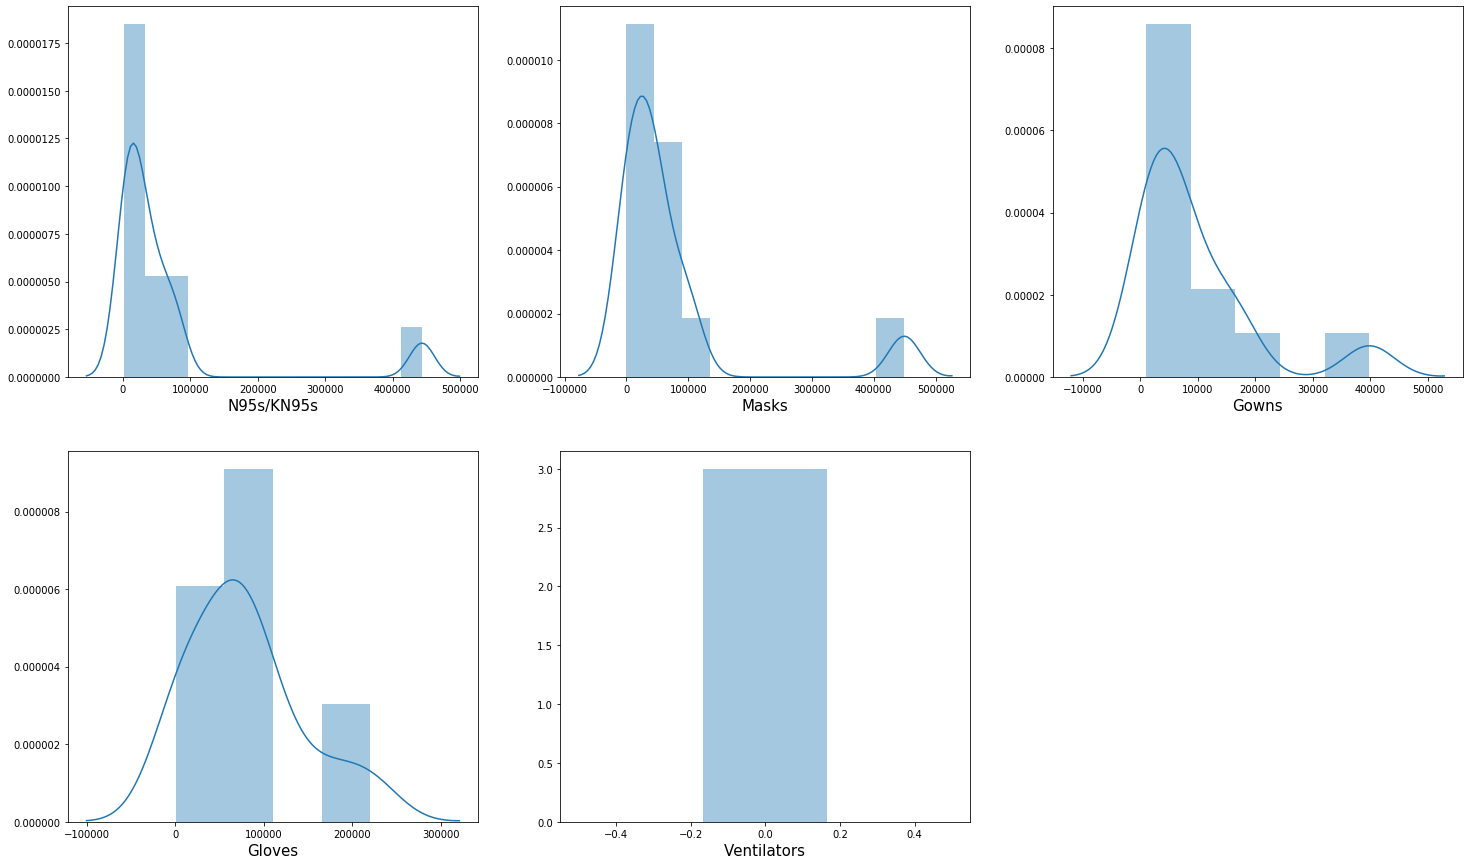

In [15]:
MW = df.loc[df['Region']=='Metro West']
MW_CC = MW.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    MW_CC['{} %'.format(category)] = MW_CC[category]/MW_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(MW_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
MW_CC

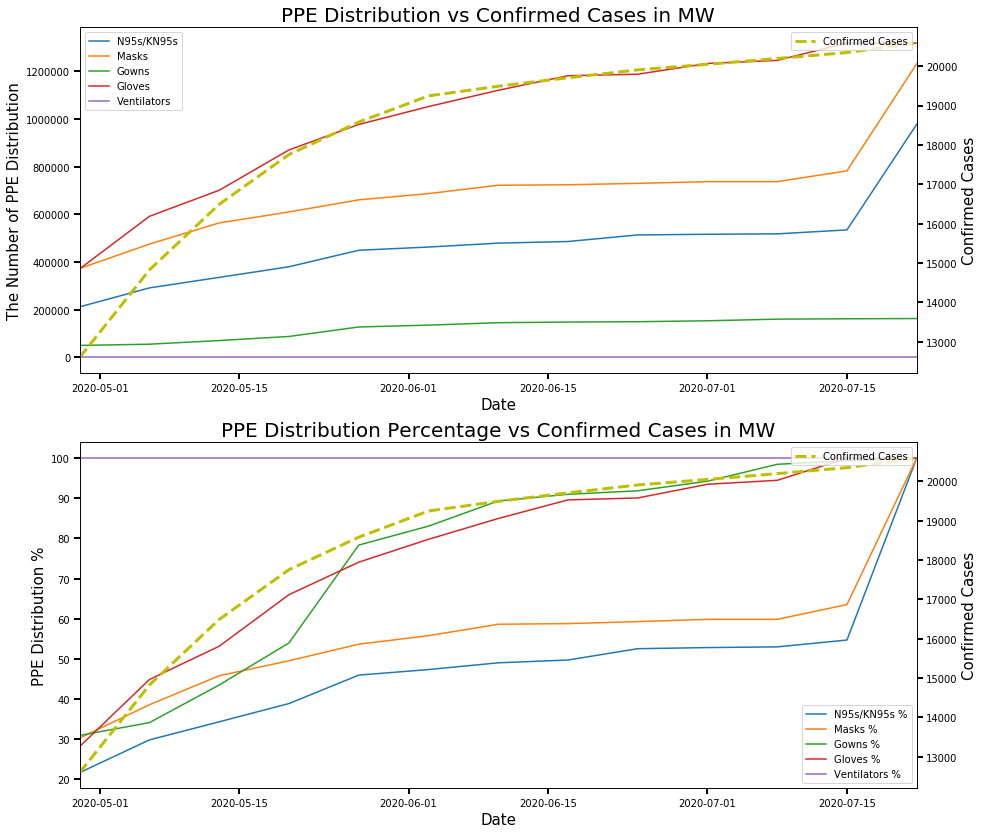

In [16]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=MW_CC)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in MW', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=MW_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=MW_CC)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in MW', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=MW_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [17]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    MW_CC['{} Ratio 1'.format(category)] = MW_CC[category]/MW_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
MW_CC['Confirmed Cases(ma1)'] = MW_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
MW_CC.iloc[0,-1] = (9219+12601) / 2
for category in categories:
    MW_CC['{} Ratio 2'.format(category)] = MW_CC[category]/MW_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
MW_CC['Confirmed Cases(ma2)'] = MW_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    MW_CC['{} Ratio 3'.format(category)] = MW_CC[category]/MW_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
MW_CC['Confirmed Cases(ma3)'] = MW_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
MW_CC.iloc[0,-1] = (9219+12601+14825)/3
for category in categories:
    MW_CC['{} Ratio 4'.format(category)] = MW_CC[category]/MW_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    MW_CC['{} Ratio 5'.format(category)] = MW_CC[category].diff()/MW_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    MW_CC['{} Ratio 6'.format(category)] = MW_CC[category].diff()/MW_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
MW_CC

Time      Region  N95s/KN95s      Masks     Gowns     Gloves  \
74  2020-04-29  Metro West    212466.0   373412.0   50610.0   372180.0   
81  2020-05-06  Metro West    292073.0   475762.0   55812.0   592330.0   
88  2020-05-13  Metro West    336159.0   564732.0   71127.0   701630.0   
95  2020-05-20  Metro West    380619.0   610582.0   88237.0   870902.0   
102 2020-05-27  Metro West    449855.0   661482.0  128047.0   977602.0   
103 2020-06-03  Metro West    463396.0   687532.0  135759.0  1052774.0   
104 2020-06-10  Metro West    479836.0   722682.0  145989.0  1121074.0   
105 2020-06-17  Metro West    486648.0   724682.0  148709.0  1182274.0   
106 2020-06-24  Metro West    514245.0   730682.0  150139.0  1188574.0   
107 2020-07-01  Metro West    516985.0   737682.0  154039.0  1233574.0   
108 2020-07-08  Metro West    518680.0   737682.0  160914.0  1246574.0   
109 2020-07-15  Metro West    535320.0   783032.0  162441.0  1319174.0   
110 2020-07-22  Metro West    978560.0  1232432.0  163441.0  1319574.0   

     Ventilators  Confirmed Cases  Hospitalized Total  Hospitalized ICU  \
74         136.0          12601.0              1136.0             291.0   
81         136.0          14825.0              1010.0             253.0   
88         136.0          16491.0               853.0             209.0   
95         136.0          17755.0               672.0             173.0   
102        136.0          18580.0               552.0             149.0   
103        136.0          19245.0               423.0             103.0   
104        136.0          19490.0               300.0              81.0   
105        136.0          19706.0               253.0              57.0   
106        136.0          19906.0               243.0              40.0   
107        136.0          20047.0               187.0              33.0   
108        136.0          20195.0               188.0              27.0   
109        136.0          20346.0               158.0              17.0   
110        136.0          20589.0               157.0              20.0   

     N95s/KN95s %     Masks %     Gowns %    Gloves %  Ventilators %  \
74      21.712108   30.298791   30.965302   28.204557          100.0   
81      29.847224   38.603509   34.148102   44.887971          100.0   
88      34.352416   45.822569   43.518456   53.170948          100.0   
95      38.895827   49.542855   53.987066   65.998724          100.0   
102     45.971121   53.672900   78.344479   74.084667          100.0   
103     47.354889   55.786607   83.063001   79.781354          100.0   
104     49.034908   58.638692   89.322141   84.957267          100.0   
105     49.731033   58.800972   90.986350   89.595127          100.0   
106     52.551198   59.287815   91.861283   90.072554          100.0   
107     52.831201   59.855797   94.247465   93.482745          100.0   
108     53.004415   59.855797   98.453876   94.467912          100.0   
109     54.704872   63.535514   99.388158   99.969687          100.0   
110    100.000000  100.000000  100.000000  100.000000          100.0   

     N95s/KN95s Ratio 1  Masks Ratio 1  Gowns Ratio 1  Gloves Ratio 1  \
74            16.861043      29.633521       4.016348       29.535751   
81            19.701383      32.091872       3.764722       39.954806   
88            20.384391      34.244861       4.313080       42.546237   
95            21.437285      34.389299       4.969699       49.051084   
102           24.211787      35.601830       6.891658       52.615823   
103           24.078774      35.725227       7.054248       54.703767   
104           24.619600      37.079631       7.490457       57.520472   
105           24.695423      36.774688       7.546382       59.995636   
106           25.833668      36.706621       7.542399       59.709334   
107           25.788647      36.797626       7.683893       61.534095   
108           25.683585      36.527952       7.968012       61.726863   
109           26.310823      38.48579

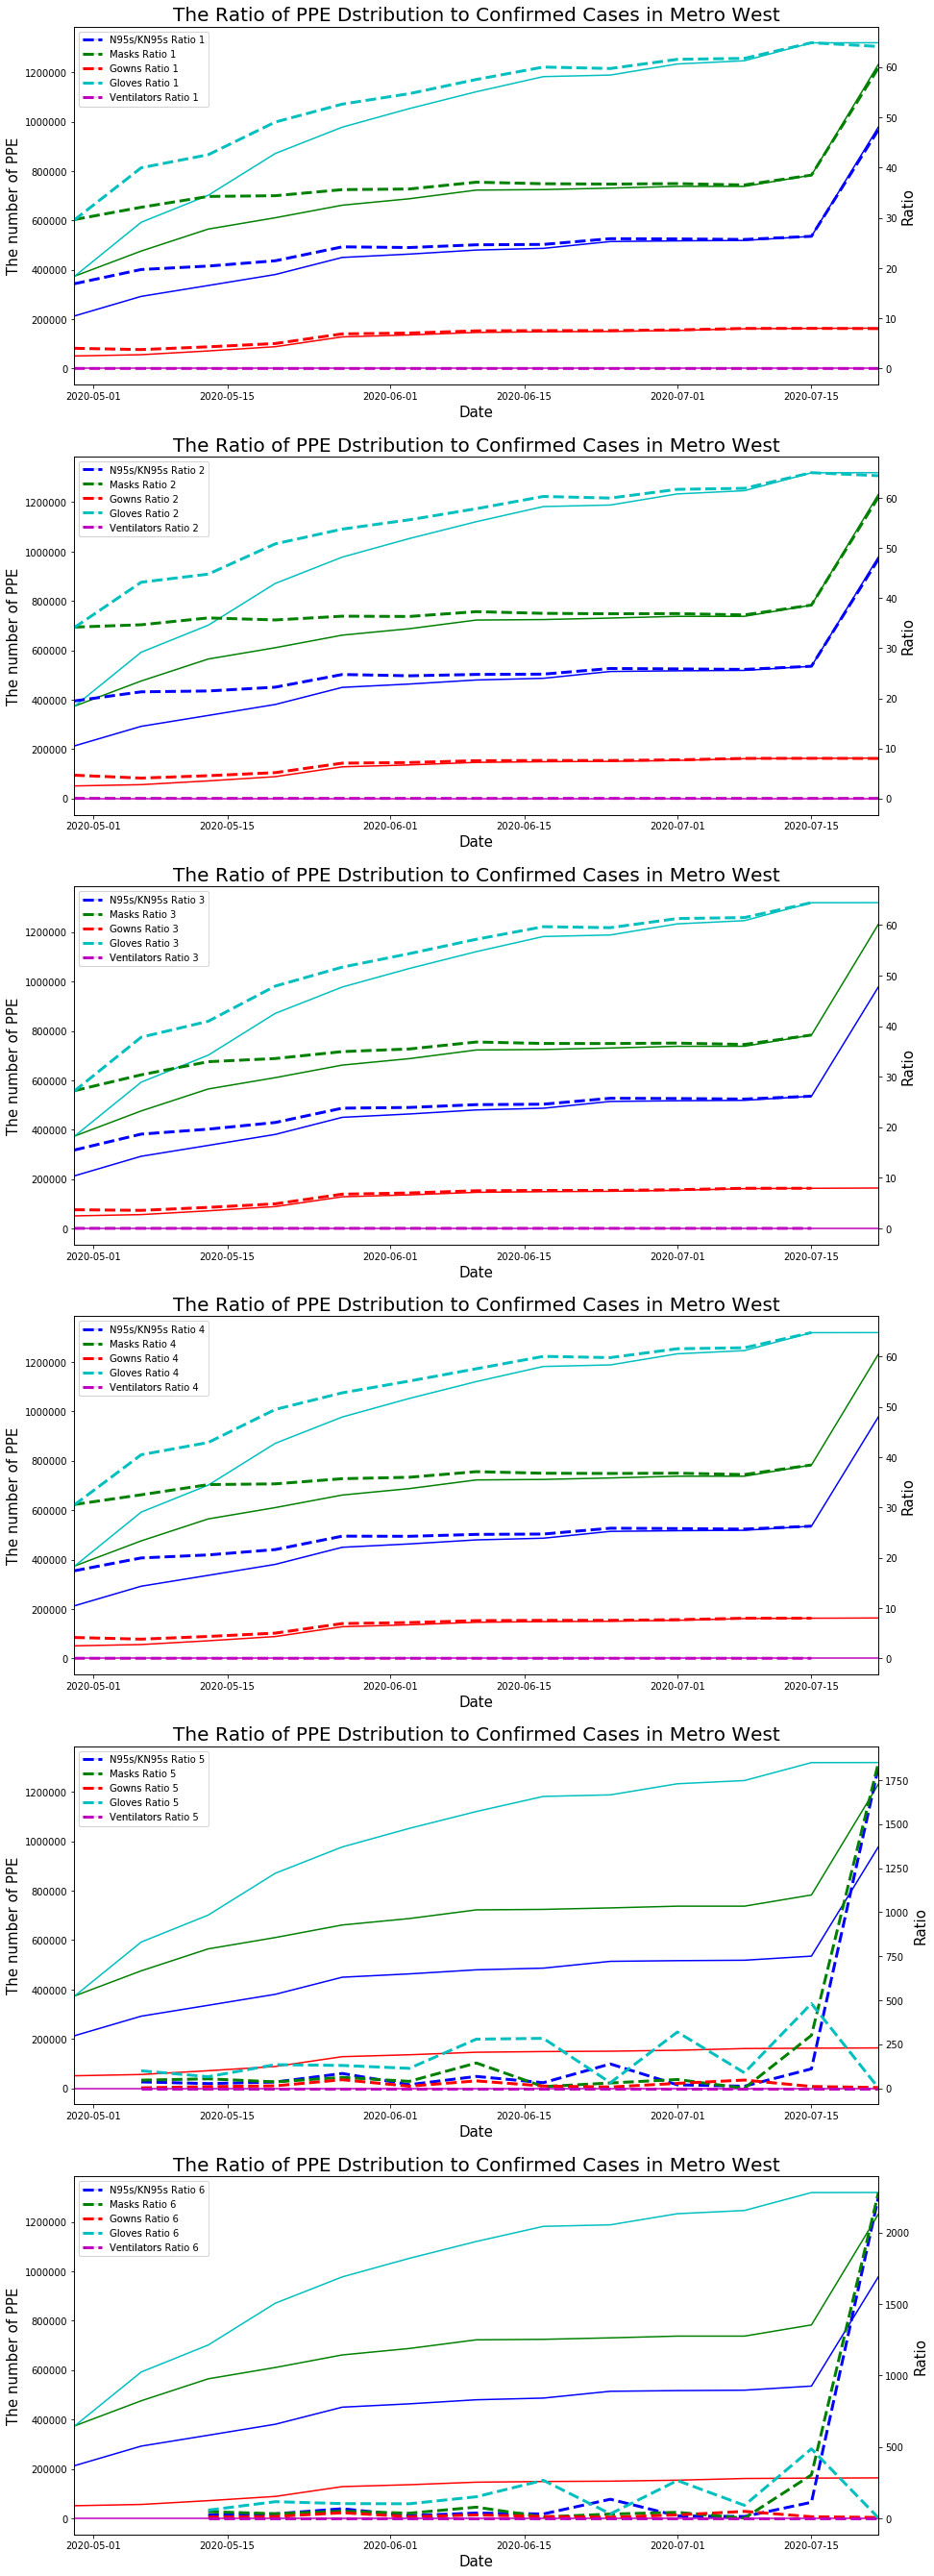

In [18]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=MW_CC, color=color[categories.index(category)])
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Metro West', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=MW_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

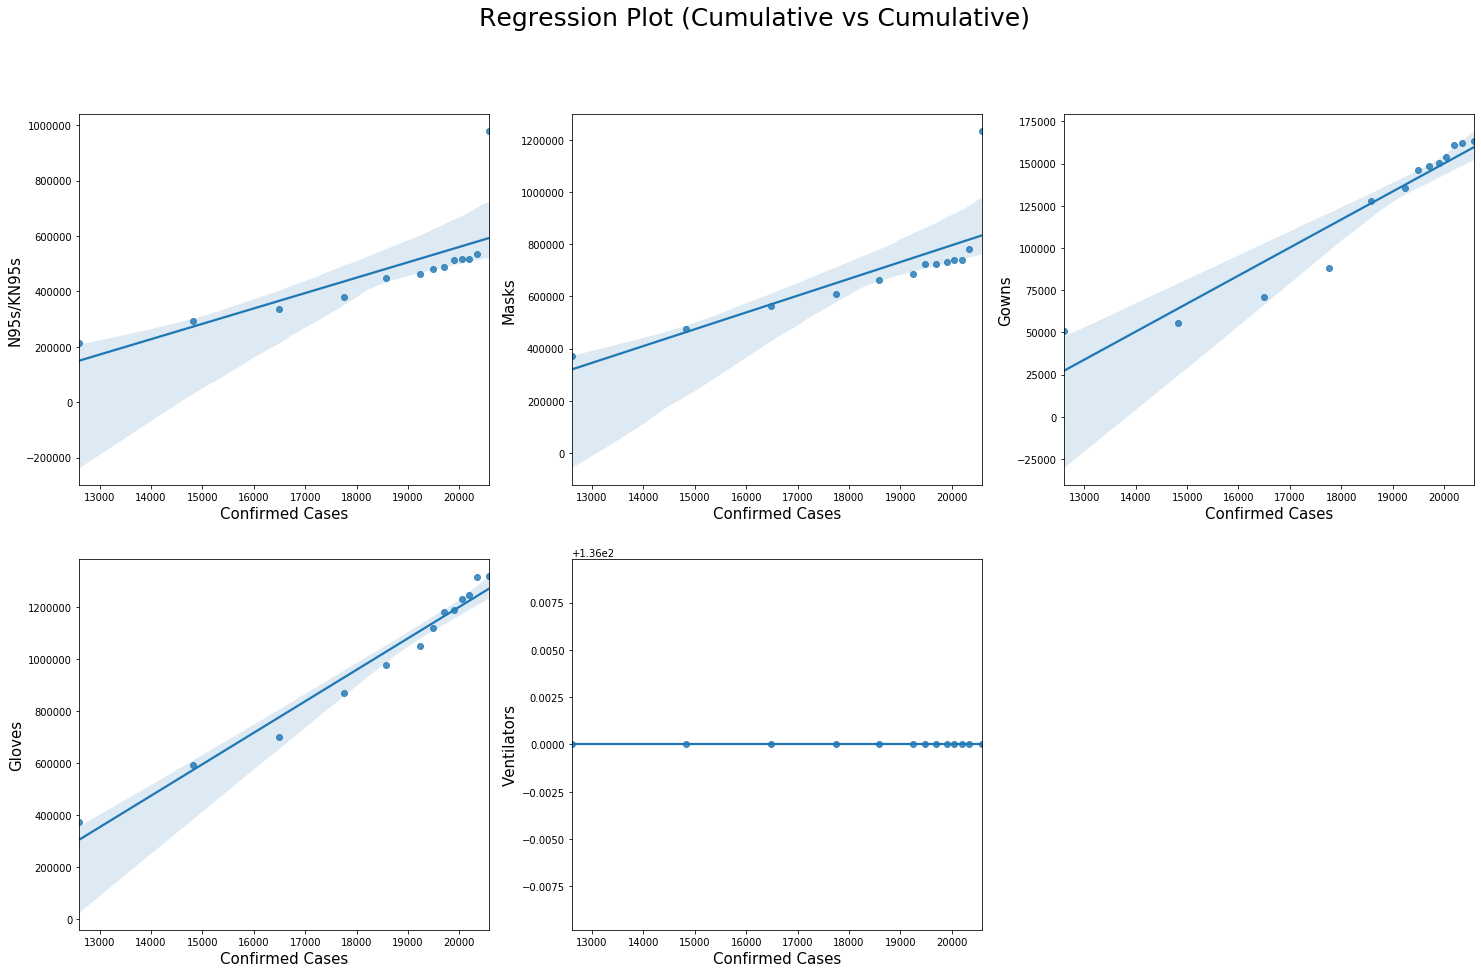

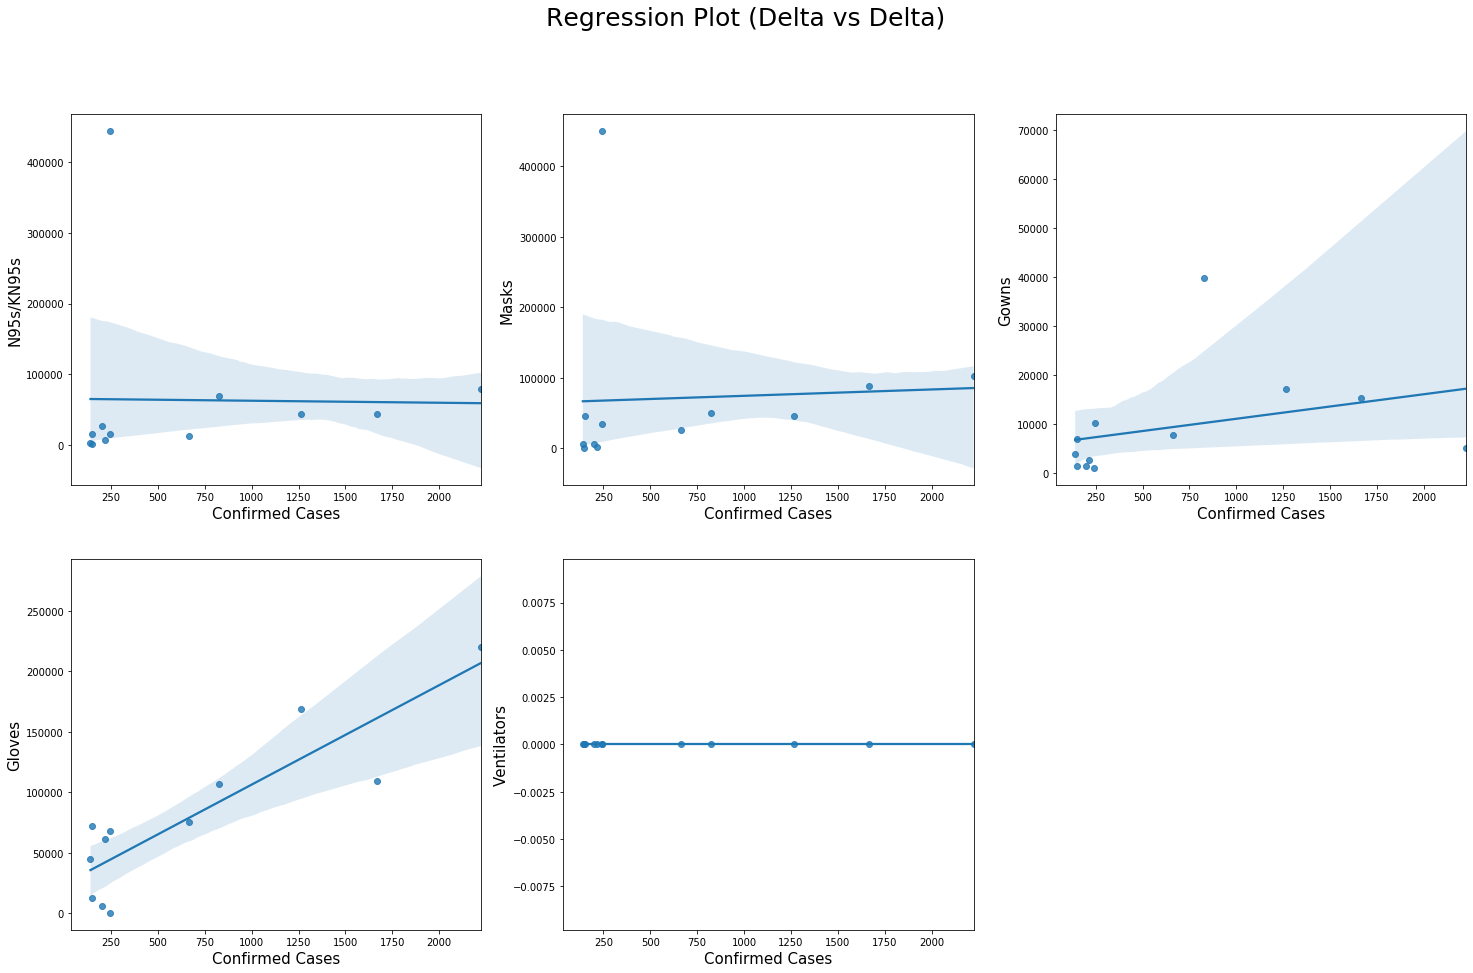

In [19]:
for category in categories:
    MW_CC['{} delta'.format(category)] = MW_CC[category].diff()
    MW_CC['Confirmed Cases delta'] = MW_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=MW_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=MW_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [20]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = MW_CC[category]
    X[categories.index(category)] = MW_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     13.71
Date:                Fri, 24 Jul 2020   Prob (F-statistic):            0.00349
Time:                        23:43:24   Log-Likelihood:                -170.06
No. Observations:                  13   AIC:                             344.1
Df Residuals:                      11   BIC:                             345.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -5.5e+05   2.79e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Metro Boston

Time        Region  N95s/KN95s     Masks    Gowns    Gloves  \
37 2020-04-29  Metro Boston     94235.0  130800.0  23036.0  465692.0   
44 2020-05-06  Metro Boston    115642.0  146600.0  27956.0  535892.0   
51 2020-05-13  Metro Boston    127621.0  187600.0  31366.0  575792.0   
58 2020-05-20  Metro Boston    135101.0  217400.0  37846.0  626992.0   
65 2020-05-27  Metro Boston    157158.0  234150.0  43206.0  646892.0   
66 2020-06-03  Metro Boston    159715.0  238150.0  46156.0  676892.0   
67 2020-06-10  Metro Boston    161838.0  242350.0  47216.0  673292.0   
68 2020-06-17  Metro Boston    163040.0  246350.0  48436.0  678892.0   
69 2020-06-24  Metro Boston    163736.0  251350.0  48511.0  691942.0   
70 2020-07-01  Metro Boston    165116.0  256850.0  49011.0  701342.0   
71 2020-07-08  Metro Boston    168236.0  259850.0  49511.0  716342.0   
72 2020-07-15  Metro Boston    179881.0  294100.0  51711.0  720342.0   
73 2020-07-22  Metro Boston    345331.0  467100.0  54111.0  720342.0   

    Ventilators  Confirmed Cases  Hospitalized Total  Hospitalized ICU  \
37        204.0          12539.0              1194.0             388.0   
44        204.0          14476.0              1011.0             330.0   
51        204.0          15587.0               823.0             264.0   
58        204.0          16962.0               703.0             240.0   
65        204.0          17596.0               583.0             176.0   
66        204.0          18108.0               442.0             125.0   
67        204.0          18398.0               404.0             100.0   
68        204.0          18652.0               288.0              77.0   
69        204.0          18805.0               250.0              67.0   
70        204.0          18978.0               215.0              41.0   
71        204.0          19186.0               203.0              26.0   
72        204.0          19428.0               193.0              35.0   
73        204.0          19637.0               149.0              14.0   

    N95s/KN95s %     Masks %     Gowns %    Gloves %  Ventilators %  
37     27.288312   28.002569   42.571751   64.648736          100.0  
44     33.487292   31.385142   51.664172   74.394107          100.0  
51     36.956138   40.162706   57.966033   79.933143          100.0  
58     39.122176   46.542496   69.941417   87.040878          100.0  
65     45.509381   50.128452   79.846981   89.803454          100.0  
66     46.249830   50.984800   85.298738   93.968143          100.0  
67     46.864602   51.883965   87.257674   93.468380          100.0  
68     47.212674   52.740313   89.512299   94.245789          100.0  
69     47.414220   53.810747   89.650903   96.057428          100.0  
70     47.813837   54.988225   90.574929   97.362364          100.0  
71     48.717318   55.630486   91.498956   99.444708          100.0  
72     52.089445   62.962963   95.564673  100.000000          100.0  
73    100.000000  100.000000  100.000000  100.000000          100.0

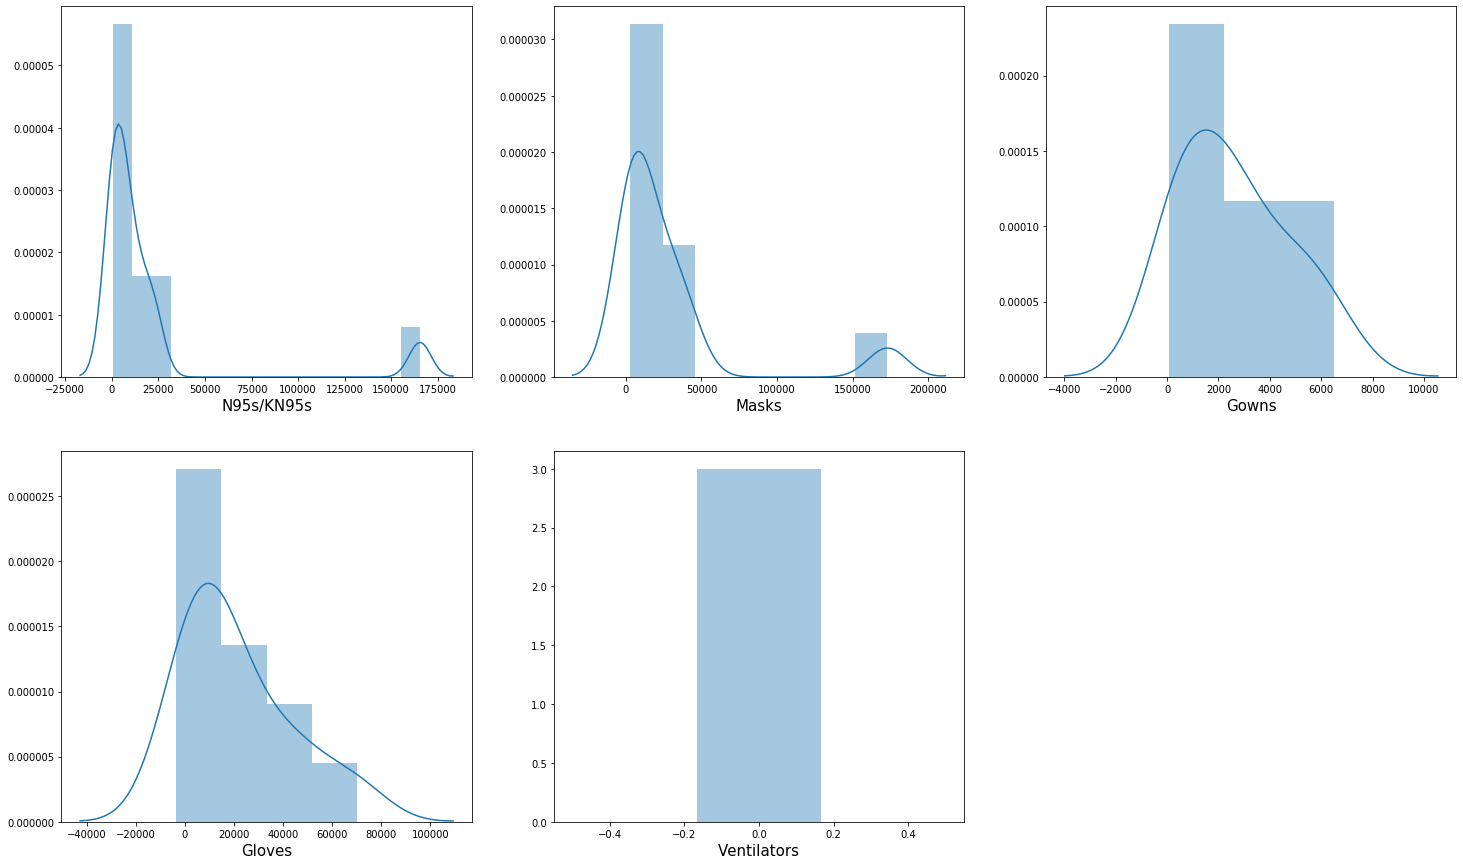

In [21]:
MB = df.loc[df['Region']=='Metro Boston']
MB_CC = MB.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    MB_CC['{} %'.format(category)] = MB_CC[category]/MB_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(MB_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
MB_CC

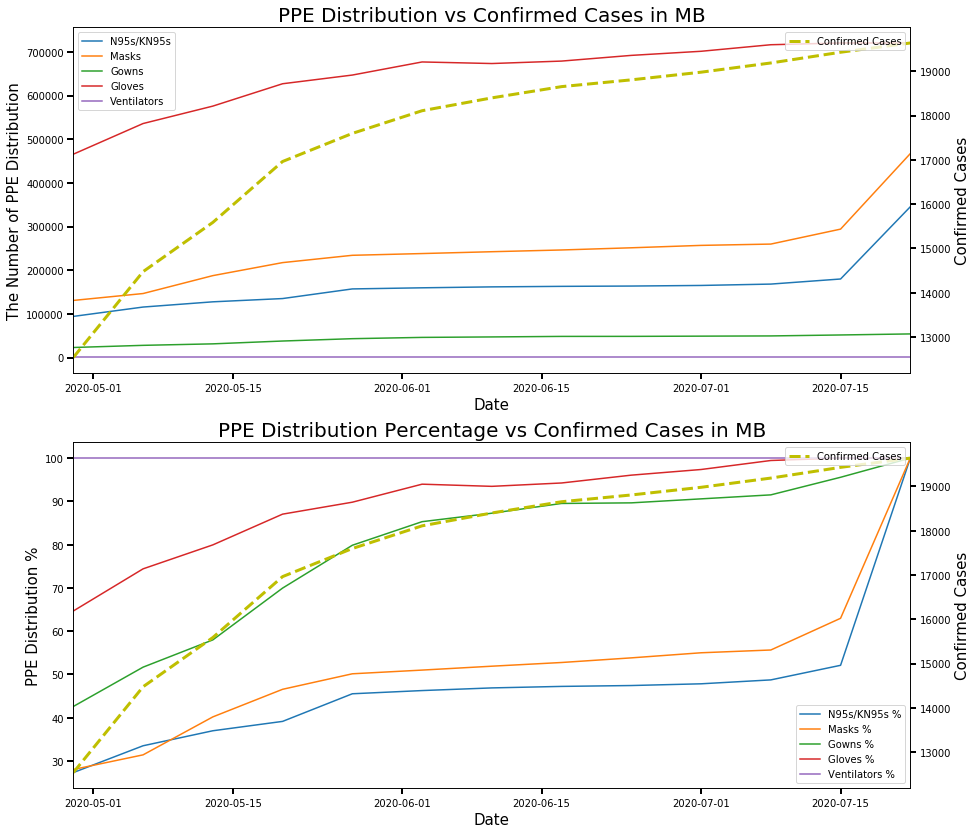

In [22]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=MB_CC)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in MB', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=MB_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=MB_CC)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in MB', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=MB_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [23]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    MB_CC['{} Ratio 1'.format(category)] = MB_CC[category]/MB_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
MB_CC['Confirmed Cases(ma1)'] = MB_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
MB_CC.iloc[0,-1] = (9060+12539) / 2
for category in categories:
    MB_CC['{} Ratio 2'.format(category)] = MB_CC[category]/MB_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
MB_CC['Confirmed Cases(ma2)'] = MB_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    MB_CC['{} Ratio 3'.format(category)] = MB_CC[category]/MB_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
MB_CC['Confirmed Cases(ma3)'] = MB_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
MB_CC.iloc[0,-1] = (9060+12539+14476)/3
for category in categories:
    MB_CC['{} Ratio 4'.format(category)] = MB_CC[category]/MB_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    MB_CC['{} Ratio 5'.format(category)] = MB_CC[category].diff()/MB_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    MB_CC['{} Ratio 6'.format(category)] = MB_CC[category].diff()/MB_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
MB_CC

Time        Region  N95s/KN95s     Masks    Gowns    Gloves  \
37 2020-04-29  Metro Boston     94235.0  130800.0  23036.0  465692.0   
44 2020-05-06  Metro Boston    115642.0  146600.0  27956.0  535892.0   
51 2020-05-13  Metro Boston    127621.0  187600.0  31366.0  575792.0   
58 2020-05-20  Metro Boston    135101.0  217400.0  37846.0  626992.0   
65 2020-05-27  Metro Boston    157158.0  234150.0  43206.0  646892.0   
66 2020-06-03  Metro Boston    159715.0  238150.0  46156.0  676892.0   
67 2020-06-10  Metro Boston    161838.0  242350.0  47216.0  673292.0   
68 2020-06-17  Metro Boston    163040.0  246350.0  48436.0  678892.0   
69 2020-06-24  Metro Boston    163736.0  251350.0  48511.0  691942.0   
70 2020-07-01  Metro Boston    165116.0  256850.0  49011.0  701342.0   
71 2020-07-08  Metro Boston    168236.0  259850.0  49511.0  716342.0   
72 2020-07-15  Metro Boston    179881.0  294100.0  51711.0  720342.0   
73 2020-07-22  Metro Boston    345331.0  467100.0  54111.0  720342.0   

    Ventilators  Confirmed Cases  Hospitalized Total  Hospitalized ICU  \
37        204.0          12539.0              1194.0             388.0   
44        204.0          14476.0              1011.0             330.0   
51        204.0          15587.0               823.0             264.0   
58        204.0          16962.0               703.0             240.0   
65        204.0          17596.0               583.0             176.0   
66        204.0          18108.0               442.0             125.0   
67        204.0          18398.0               404.0             100.0   
68        204.0          18652.0               288.0              77.0   
69        204.0          18805.0               250.0              67.0   
70        204.0          18978.0               215.0              41.0   
71        204.0          19186.0               203.0              26.0   
72        204.0          19428.0               193.0              35.0   
73        204.0          19637.0               149.0              14.0   

    N95s/KN95s %     Masks %     Gowns %    Gloves %  Ventilators %  \
37     27.288312   28.002569   42.571751   64.648736          100.0   
44     33.487292   31.385142   51.664172   74.394107          100.0   
51     36.956138   40.162706   57.966033   79.933143          100.0   
58     39.122176   46.542496   69.941417   87.040878          100.0   
65     45.509381   50.128452   79.846981   89.803454          100.0   
66     46.249830   50.984800   85.298738   93.968143          100.0   
67     46.864602   51.883965   87.257674   93.468380          100.0   
68     47.212674   52.740313   89.512299   94.245789          100.0   
69     47.414220   53.810747   89.650903   96.057428          100.0   
70     47.813837   54.988225   90.574929   97.362364          100.0   
71     48.717318   55.630486   91.498956   99.444708          100.0   
72     52.089445   62.962963   95.564673  100.000000          100.0   
73    100.000000  100.000000  100.000000  100.000000          100.0   

    N95s/KN95s Ratio 1  Masks Ratio 1  Gowns Ratio 1  Gloves Ratio 1  \
37            7.515352      10.431454       1.837148       37.139485   
44            7.988533      10.127107       1.931196       37.019342   
51            8.187656      12.035671       2.012318       36.940527   
58            7.964922      12.816885       2.231223       36.964509   
65            8.931462      13.307002       2.455444       36.763583   
66            8.820135      13.151646       2.548929       37.380826   
67            8.796500      13.172627       2.566366       36.595934   
68            8.741154      13.207699       2.596826       36.397813   
69            8.707046      13.366126       2.579686       36.795639   
70            8.700390      13.534092       2.582517       36.955527   
71            8.768685      13.543730       2.580580       37.336704   
72            9.258853      15.137945       2.661674       37.077517   
73           17.585731      23.7

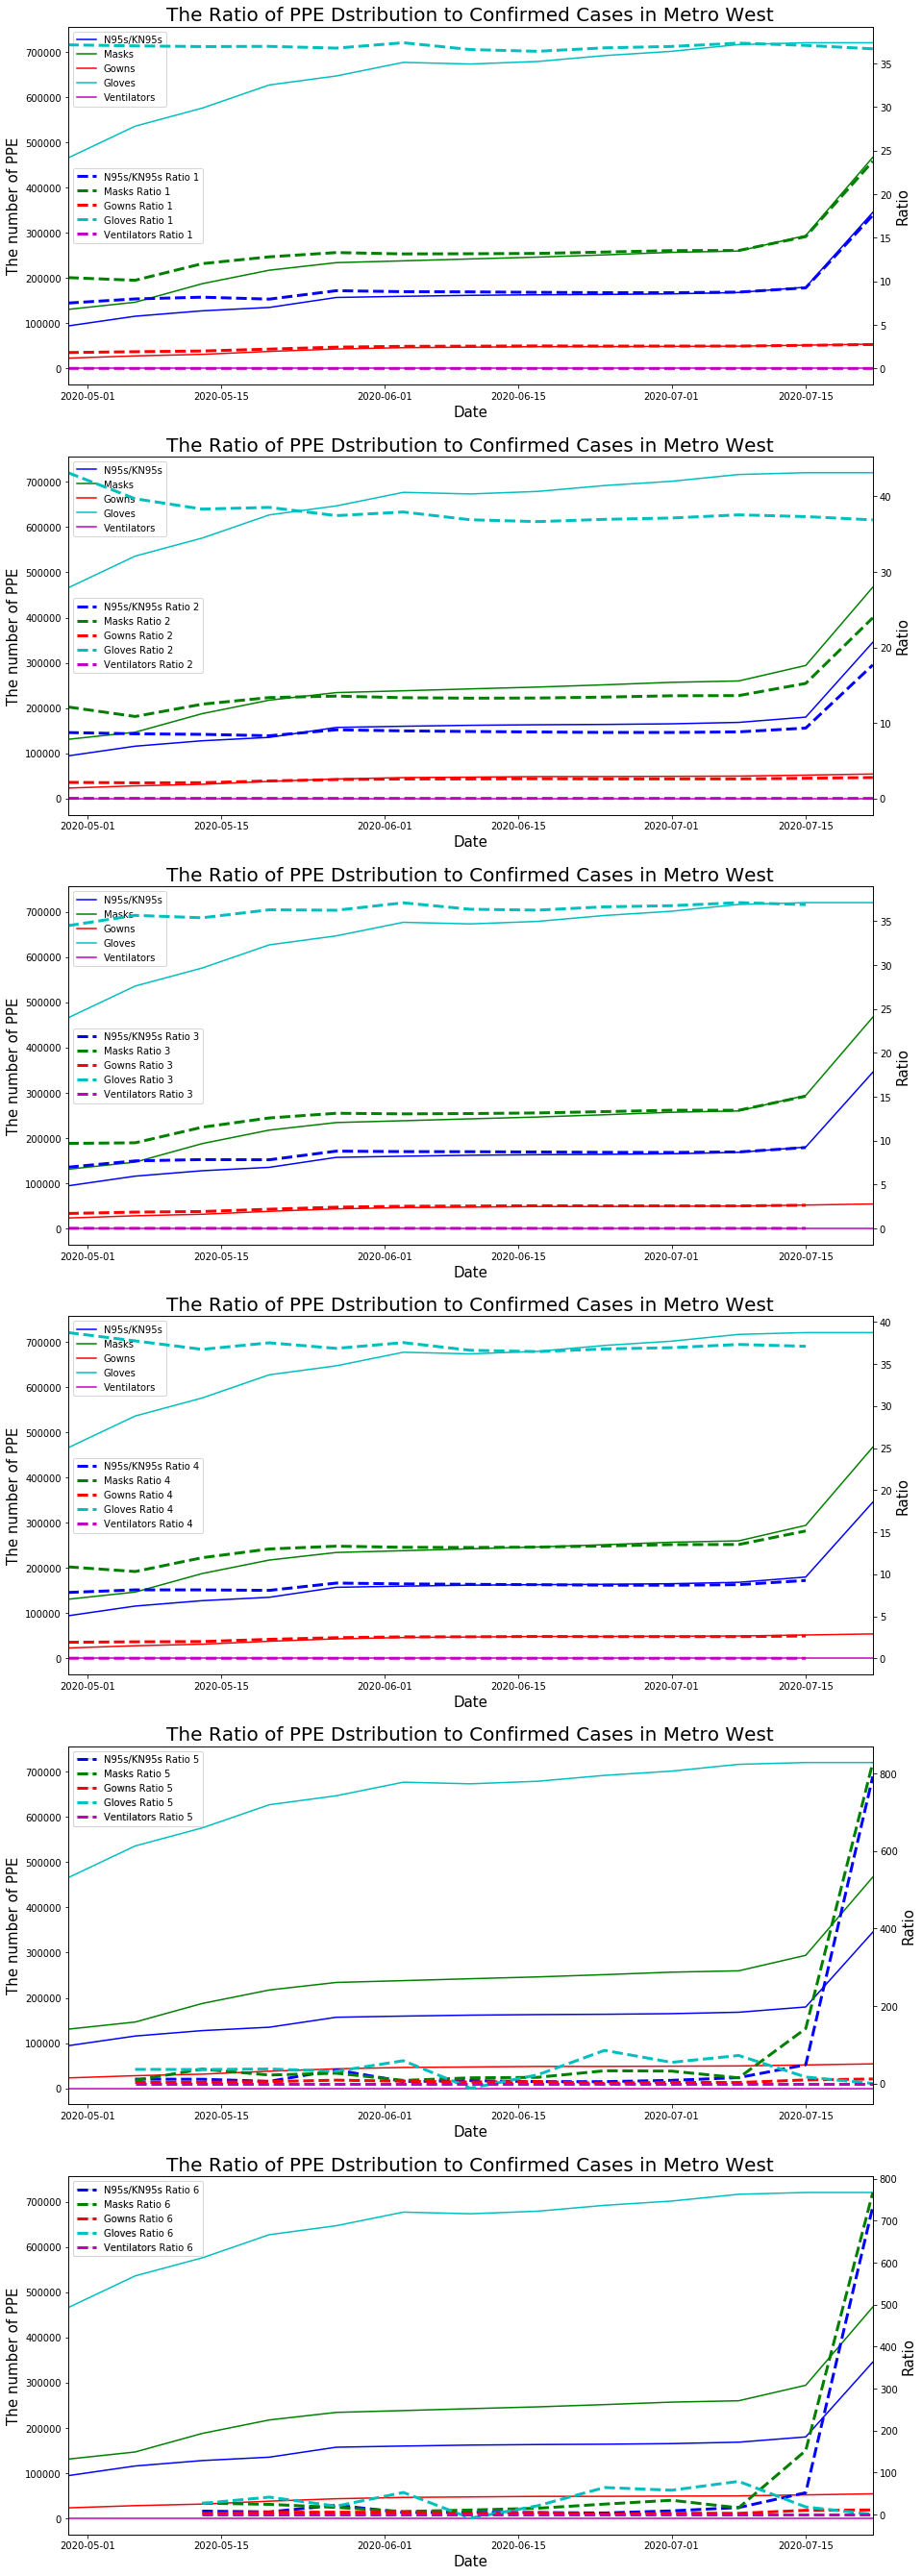

In [24]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=MB_CC, color=color[categories.index(category)])
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Metro West', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=MB_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

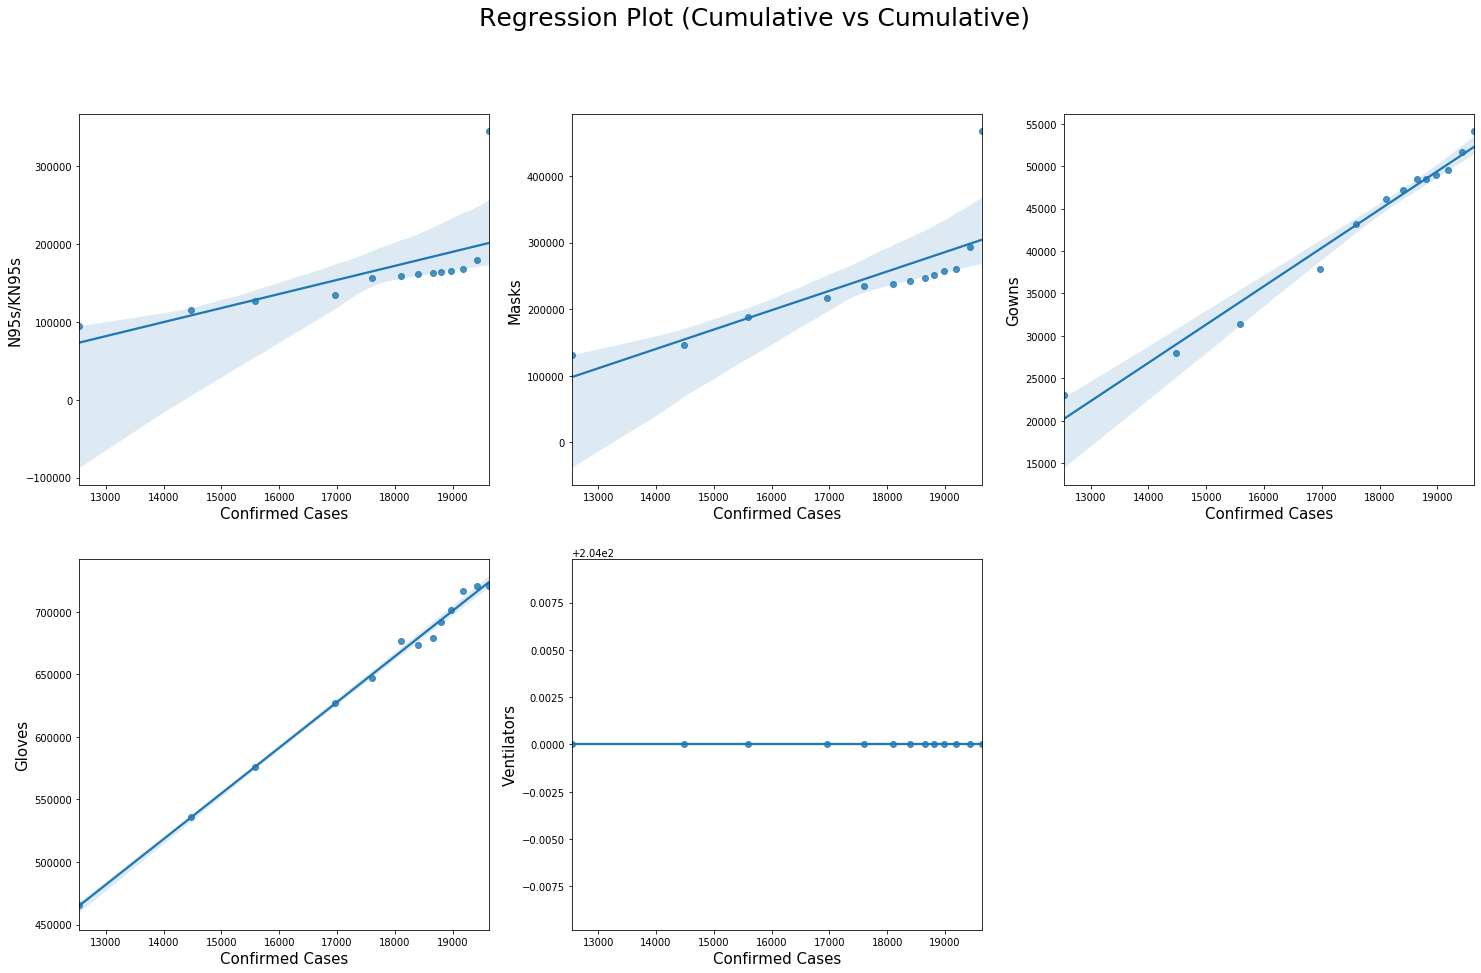

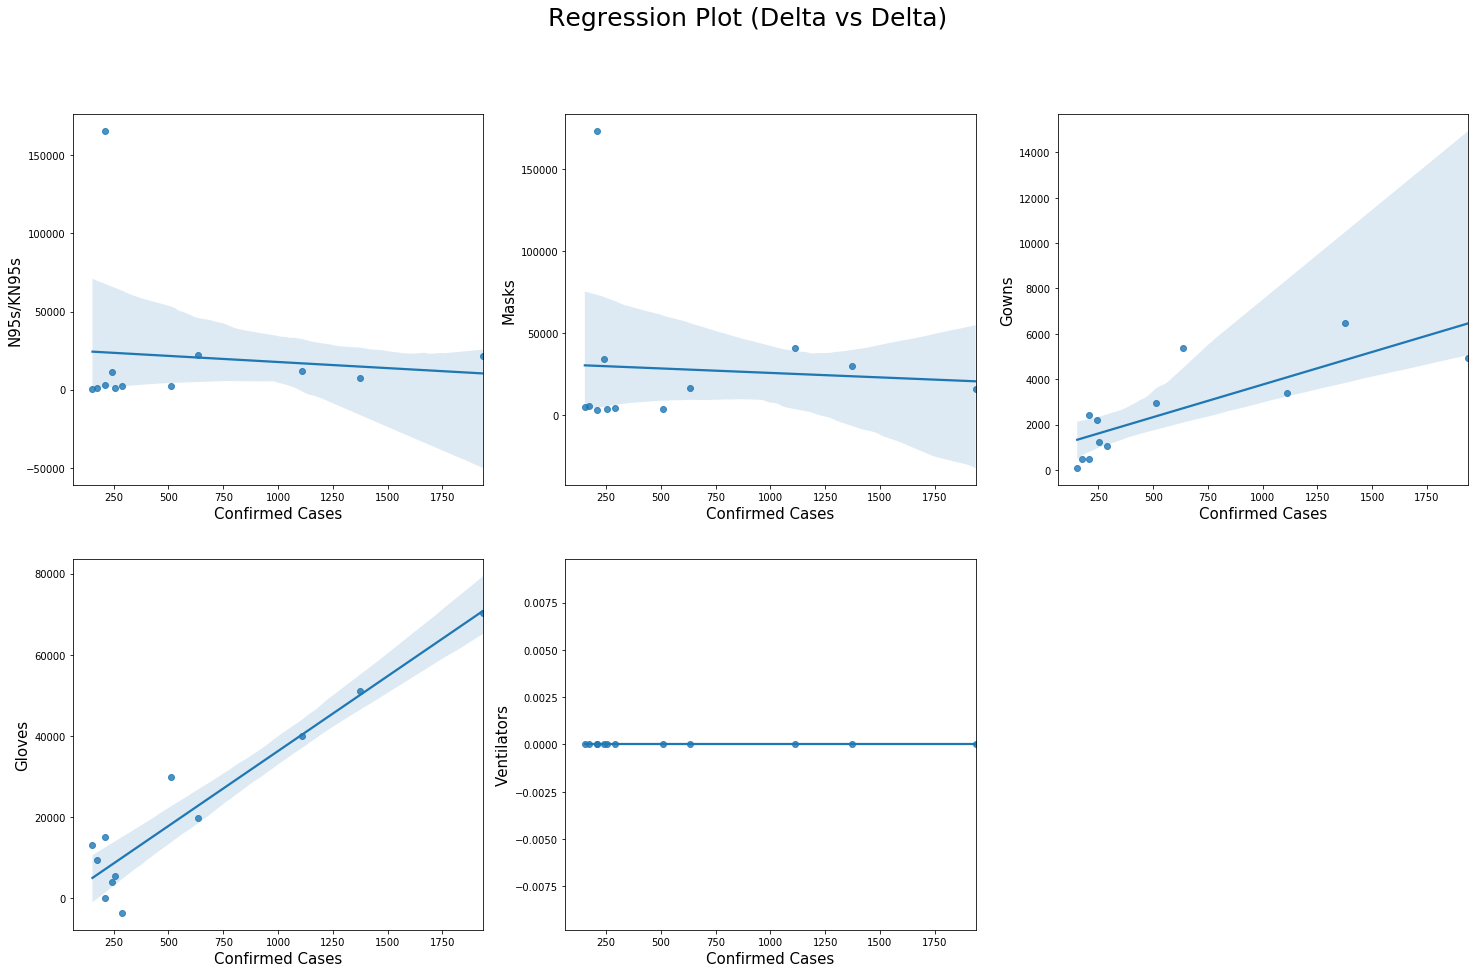

In [25]:
for category in categories:
    MB_CC['{} delta'.format(category)] = MB_CC[category].diff()
    MB_CC['Confirmed Cases delta'] = MB_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=MB_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=MB_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [26]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = MB_CC[category]
    X[categories.index(category)] = MB_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     8.078
Date:                Fri, 24 Jul 2020   Prob (F-statistic):             0.0160
Time:                        23:43:39   Log-Likelihood:                -157.28
No. Observations:                  13   AIC:                             318.6
Df Residuals:                      11   BIC:                             319.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.532e+05   1.12e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Central Massachusetts

In [27]:
CM = df.loc[df['Region']=='Central Massachusetts']
CM_CC = CM.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    CM_CC['{} %'.format(category)] = CM_CC[category]/CM_CC[category].iloc[-1] * 100
    
# fig, axes = plt.subplots(2, 3, figsize=(25,15))
# for ax, category in zip(axes.flatten(), categories):
#     sns.distplot(CM_CC[category].diff(), ax=ax)
#     ax.set_xlabel(category, fontsize=15)
# fig.delaxes(axes[1,2])
CM_CC

Time                 Region  N95s/KN95s     Masks    Gowns  \
0  2020-04-29  Central Massachusetts    138350.0  263767.0  43293.0   
7  2020-05-06  Central Massachusetts    170144.0  292767.0  46627.0   
14 2020-05-13  Central Massachusetts    184220.0  350367.0  54390.0   
21 2020-05-20  Central Massachusetts    191280.0  364617.0  60380.0   
28 2020-05-27  Central Massachusetts    220534.0  392367.0  69922.0   
29 2020-06-03  Central Massachusetts    239254.0  420667.0  75489.0   
30 2020-06-10  Central Massachusetts    246659.0  456767.0  79129.0   
31 2020-06-17  Central Massachusetts    245449.0  462867.0  83339.0   
32 2020-06-24  Central Massachusetts    246509.0  465367.0  84339.0   
33 2020-07-01  Central Massachusetts    248049.0  472067.0  88739.0   
34 2020-07-08  Central Massachusetts    249229.0  474167.0  90249.0   
35 2020-07-15  Central Massachusetts    254659.0  493317.0  93149.0   
36 2020-07-22  Central Massachusetts    425969.0  687317.0  93149.0   

       Gloves  Ventilators  Confirmed Cases  Hospitalized Total  \
0    454250.0         79.0           5363.0               316.0   
7    794650.0         79.0           7056.0               295.0   
14   858250.0         79.0           8335.0               287.0   
21   889350.0         79.0           9857.0               269.0   
28   905950.0         83.0          10743.0               253.0   
29   975650.0         83.0          11296.0               166.0   
30   986150.0         83.0          11641.0               118.0   
31  1003150.0         83.0          11827.0                85.0   
32  1007650.0         83.0          12001.0                84.0   
33  1013850.0         83.0          12148.0                47.0   
34  1015450.0         83.0          12296.0                53.0   
35  1026050.0         83.0          12409.0                33.0   
36  1027050.0         83.0          12541.0                27.0   

    Hospitalized ICU  N95s/KN95s %     Masks %     Gowns %    Gloves %  \
0               95.0     32.478889   38.376324   46.477150   44.228616   
7               94.0     39.942813   42.595629   50.056361   77.372085   
14              92.0     43.247279   50.976042   58.390321   83.564578   
21              75.0     44.904676   53.049321   64.820878   86.592668   
28              74.0     51.772312   57.086759   75.064681   88.208948   
29              49.0     56.166998   61.204219   81.041128   94.995375   
30              34.0     57.905387   66.456526   84.948845   96.017721   
31              23.0     57.621329   67.344035   89.468486   97.672947   
32              17.0     57.870174   67.707768   90.542035   98.111095   
33              13.0     58.231702   68.682573   95.265650   98.714766   
34              12.0     58.508718   68.988109   96.886708   98.870552   
35               3.0     59.783458   71.774305  100.000000   99.902634   
36               5.0    100.000000  100.000000  100.000000  100.000000   

    Ventilators %  
0       95.180723  
7       95.180723  
14      95.180723  
21      95.180723  
28     100.000000  
29     100.000000  
30     100.000000  
31     100.000000  
32     100.000000  
33     100.000000  
34     100.000000  
35     100.000000  
36     100.000000

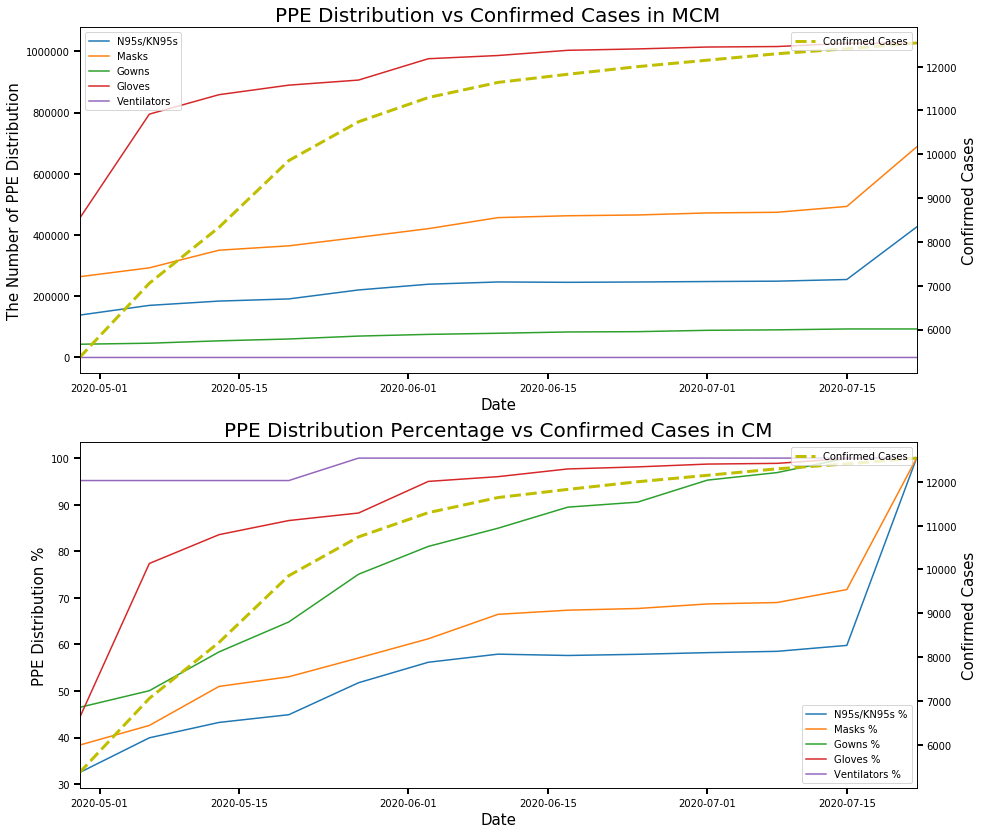

In [28]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=CM_CC)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in MCM', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=CM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=CM_CC)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in CM', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=CM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [29]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    CM_CC['{} Ratio 1'.format(category)] = CM_CC[category]/CM_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
CM_CC['Confirmed Cases(ma1)'] = CM_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
CM_CC.iloc[0,-1] = (3474+5363) / 2
for category in categories:
    CM_CC['{} Ratio 2'.format(category)] = CM_CC[category]/CM_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
CM_CC['Confirmed Cases(ma2)'] = CM_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    CM_CC['{} Ratio 3'.format(category)] = CM_CC[category]/CM_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
CM_CC['Confirmed Cases(ma3)'] = CM_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
CM_CC.iloc[0,-1] = (3474+5363+7056)/3
for category in categories:
    CM_CC['{} Ratio 4'.format(category)] = CM_CC[category]/CM_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    CM_CC['{} Ratio 5'.format(category)] = CM_CC[category].diff()/CM_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    CM_CC['{} Ratio 6'.format(category)] = CM_CC[category].diff()/CM_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
CM_CC

Time                 Region  N95s/KN95s     Masks    Gowns  \
0  2020-04-29  Central Massachusetts    138350.0  263767.0  43293.0   
7  2020-05-06  Central Massachusetts    170144.0  292767.0  46627.0   
14 2020-05-13  Central Massachusetts    184220.0  350367.0  54390.0   
21 2020-05-20  Central Massachusetts    191280.0  364617.0  60380.0   
28 2020-05-27  Central Massachusetts    220534.0  392367.0  69922.0   
29 2020-06-03  Central Massachusetts    239254.0  420667.0  75489.0   
30 2020-06-10  Central Massachusetts    246659.0  456767.0  79129.0   
31 2020-06-17  Central Massachusetts    245449.0  462867.0  83339.0   
32 2020-06-24  Central Massachusetts    246509.0  465367.0  84339.0   
33 2020-07-01  Central Massachusetts    248049.0  472067.0  88739.0   
34 2020-07-08  Central Massachusetts    249229.0  474167.0  90249.0   
35 2020-07-15  Central Massachusetts    254659.0  493317.0  93149.0   
36 2020-07-22  Central Massachusetts    425969.0  687317.0  93149.0   

       Gloves  Ventilators  Confirmed Cases  Hospitalized Total  \
0    454250.0         79.0           5363.0               316.0   
7    794650.0         79.0           7056.0               295.0   
14   858250.0         79.0           8335.0               287.0   
21   889350.0         79.0           9857.0               269.0   
28   905950.0         83.0          10743.0               253.0   
29   975650.0         83.0          11296.0               166.0   
30   986150.0         83.0          11641.0               118.0   
31  1003150.0         83.0          11827.0                85.0   
32  1007650.0         83.0          12001.0                84.0   
33  1013850.0         83.0          12148.0                47.0   
34  1015450.0         83.0          12296.0                53.0   
35  1026050.0         83.0          12409.0                33.0   
36  1027050.0         83.0          12541.0                27.0   

    Hospitalized ICU  N95s/KN95s %     Masks %     Gowns %    Gloves %  \
0               95.0     32.478889   38.376324   46.477150   44.228616   
7               94.0     39.942813   42.595629   50.056361   77.372085   
14              92.0     43.247279   50.976042   58.390321   83.564578   
21              75.0     44.904676   53.049321   64.820878   86.592668   
28              74.0     51.772312   57.086759   75.064681   88.208948   
29              49.0     56.166998   61.204219   81.041128   94.995375   
30              34.0     57.905387   66.456526   84.948845   96.017721   
31              23.0     57.621329   67.344035   89.468486   97.672947   
32              17.0     57.870174   67.707768   90.542035   98.111095   
33              13.0     58.231702   68.682573   95.265650   98.714766   
34              12.0     58.508718   68.988109   96.886708   98.870552   
35               3.0     59.783458   71.774305  100.000000   99.902634   
36               5.0    100.000000  100.000000  100.000000  100.000000   

    Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  Gowns Ratio 1  \
0       95.180723           25.797128      49.182734       8.072534   
7       95.180723           24.113379      41.491922       6.608135   
14      95.180723           22.101980      42.035633       6.525495   
21      95.180723           19.405499      36.990667       6.125596   
28     100.000000           20.528158      36.523038       6.508610   
29     100.000000           21.180418      37.240351       6.682808   
30     100.000000           21.188815      39.237780       6.797440   
31     100.000000           20.753276      39.136467       7.046504   
32     100.000000           20.540705      38.777352       7.027664   
33     100.000000           20.418917      38.859648       7.304824   
34     100.000000           20.269112      38.562703       7.339704   
35     100.000000           20.522121      39.754775       7.506568   
36     100.000000           33.966111      54.805598       7.427558   

    Gloves Ratio 1  Ventilators Ratio 1  Co

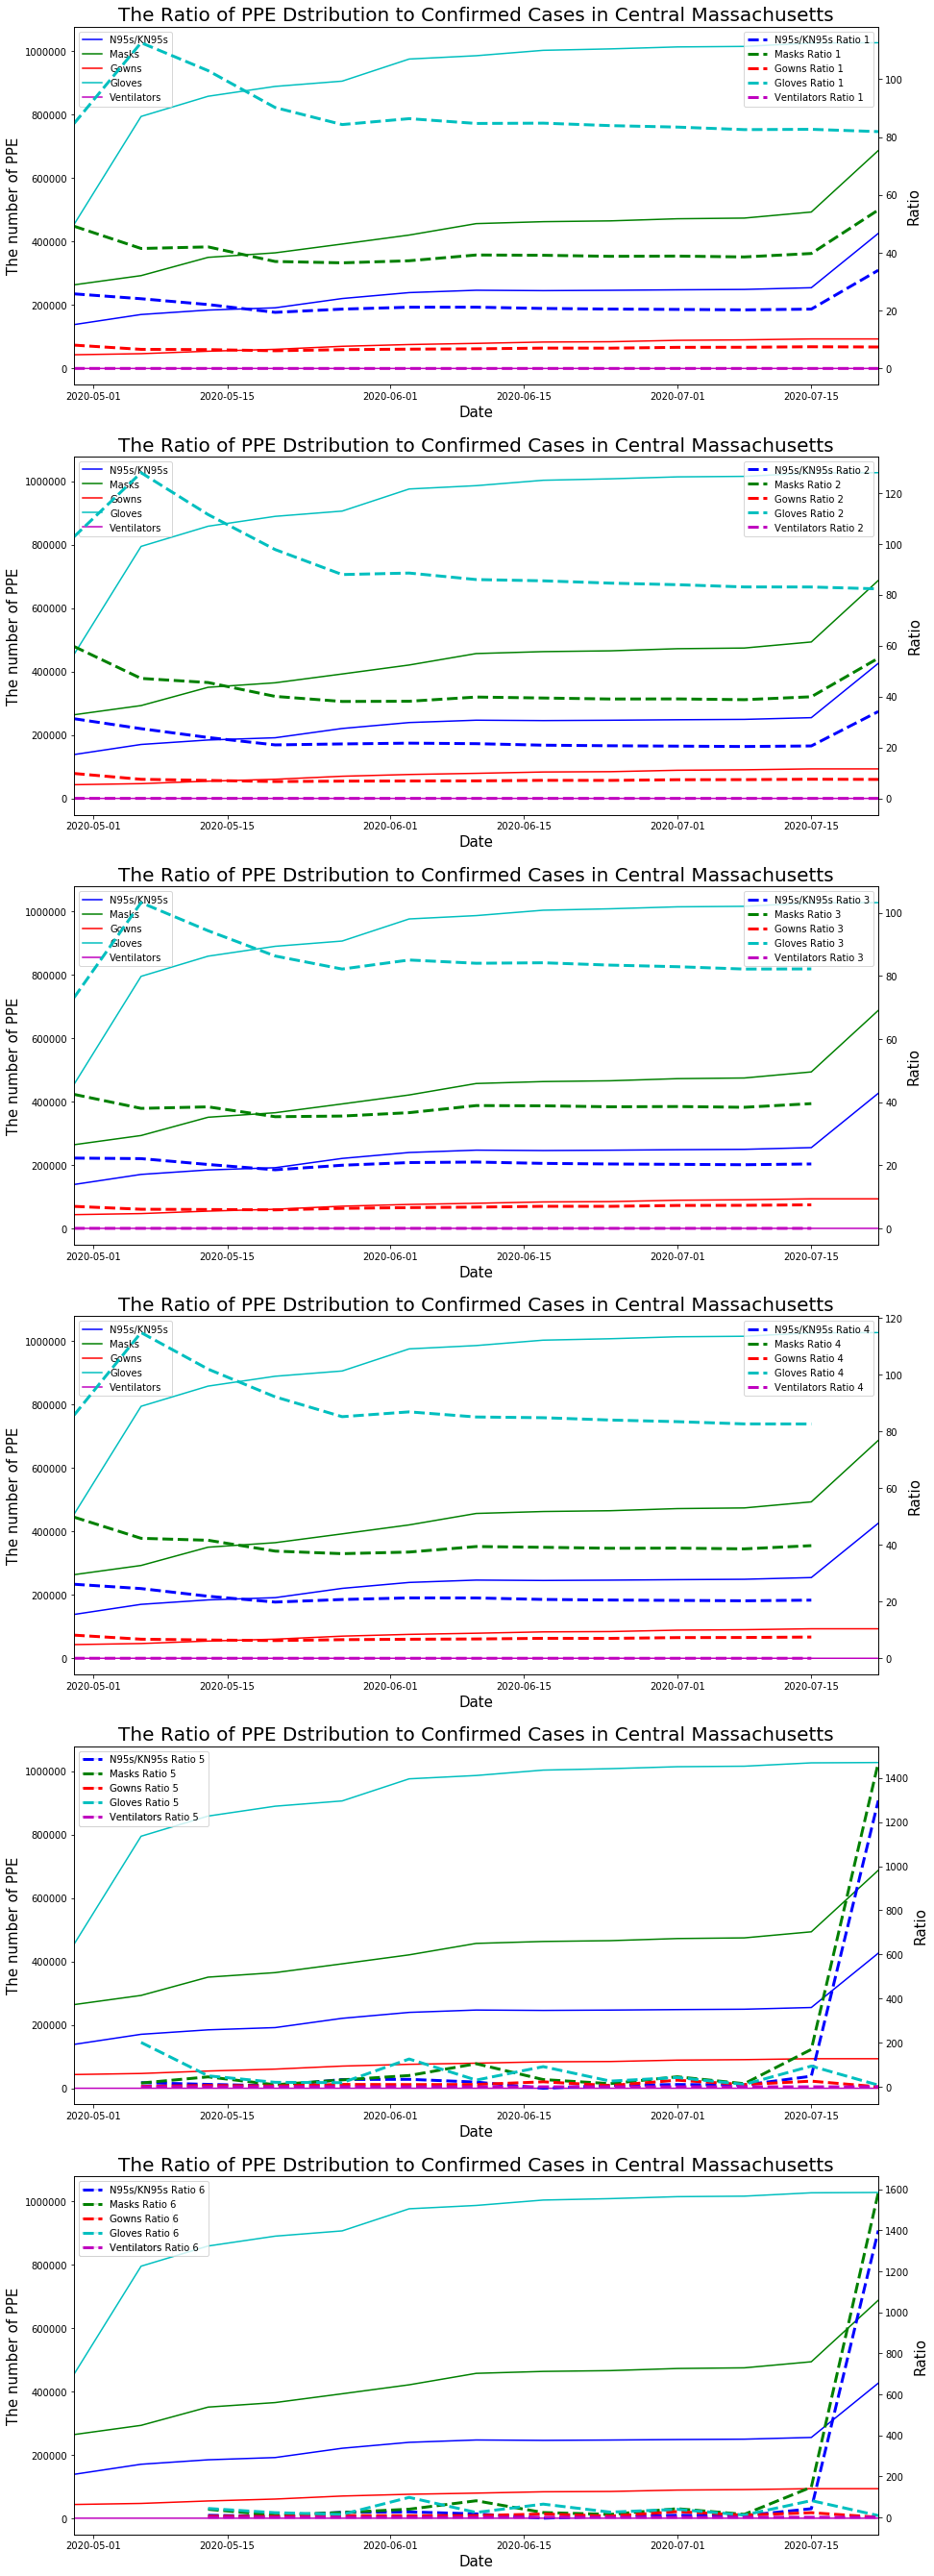

In [30]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=CM_CC, color=color[categories.index(category)])
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Central Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=CM_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

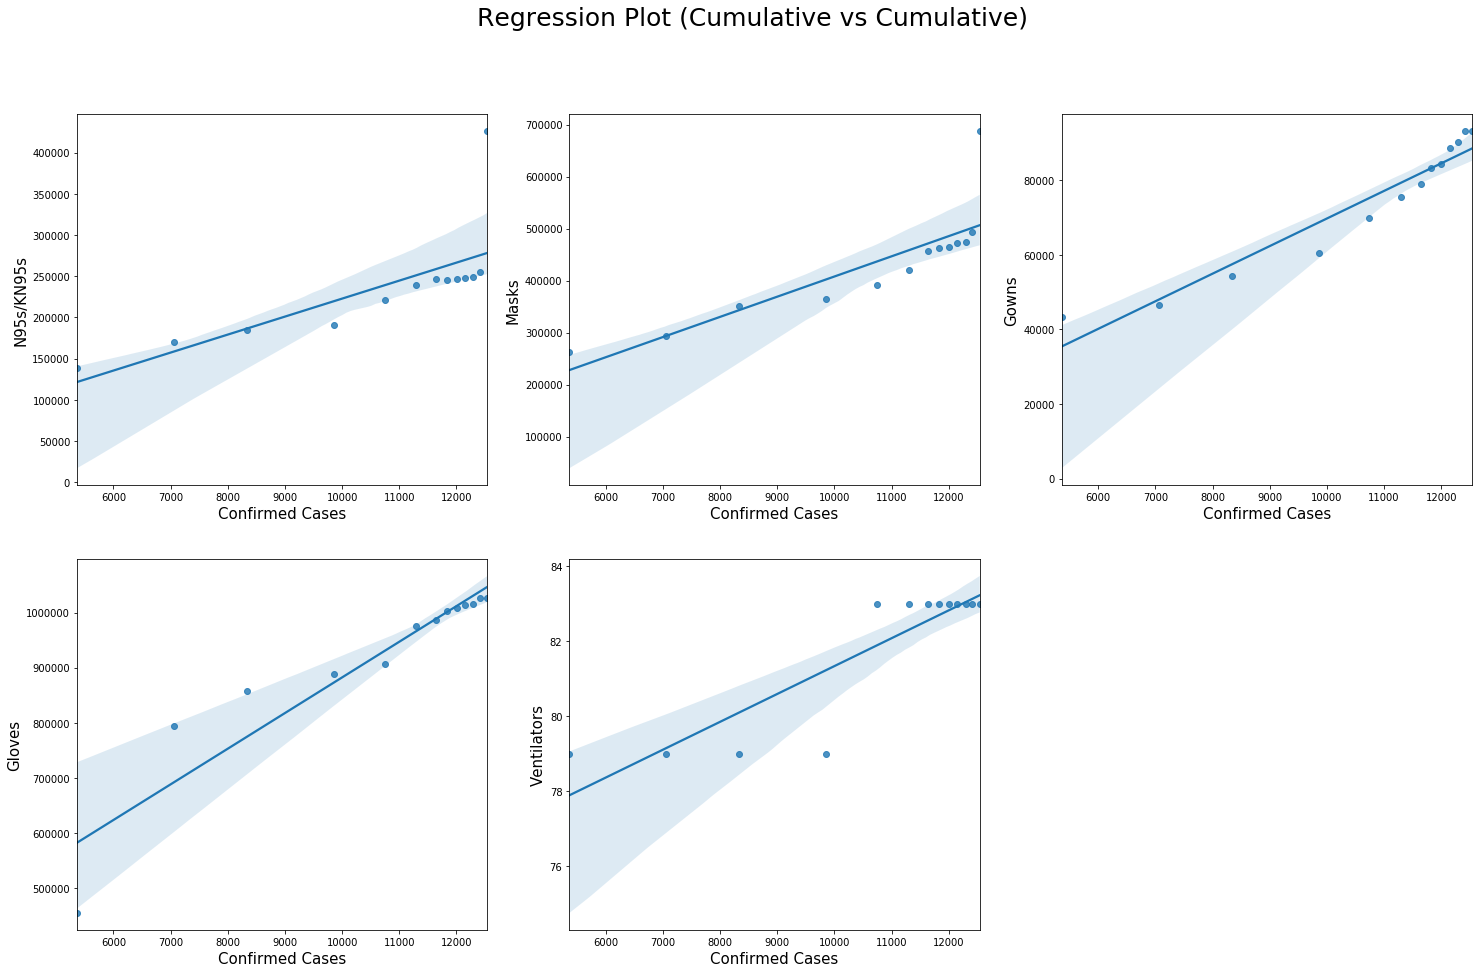

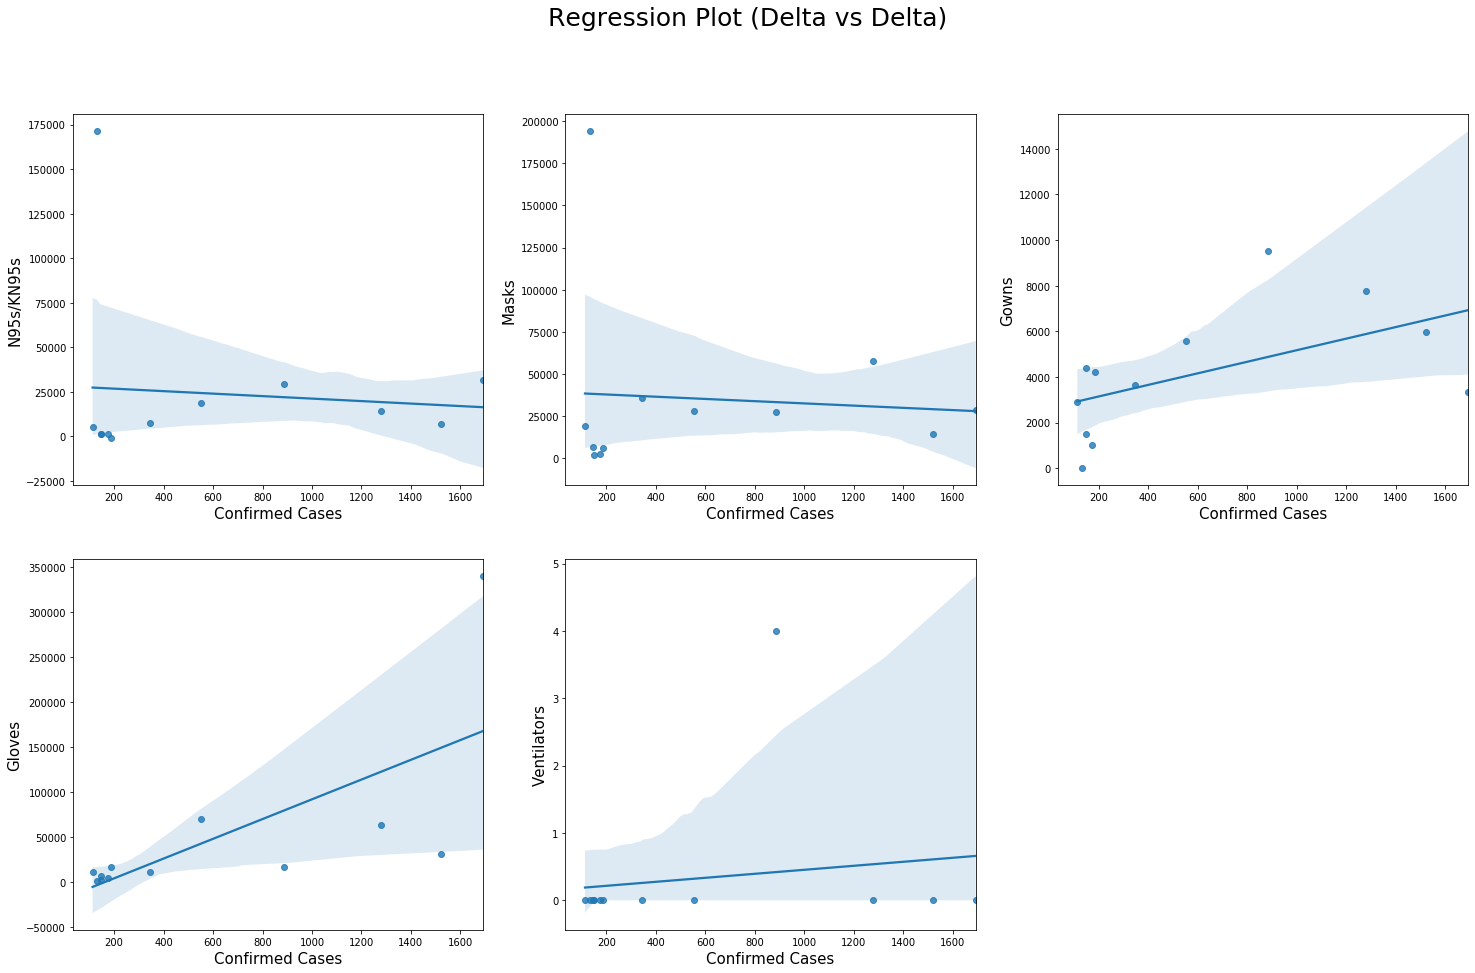

In [31]:
for category in categories:
    CM_CC['{} delta'.format(category)] = CM_CC[category].diff()
    CM_CC['Confirmed Cases delta'] = CM_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=CM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=CM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [32]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = CM_CC[category]
    X[categories.index(category)] = CM_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     12.80
Date:                Fri, 24 Jul 2020   Prob (F-statistic):            0.00434
Time:                        23:43:51   Log-Likelihood:                -157.61
No. Observations:                  13   AIC:                             319.2
Df Residuals:                      11   BIC:                             320.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4461.1312   6.59e+04     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Western Massachusetts

Time                 Region  N95s/KN95s     Masks    Gowns  \
185 2020-04-29  Western Massachusetts    156323.0  300642.0  50128.0   
192 2020-05-06  Western Massachusetts    196135.0  356892.0  52813.0   
199 2020-05-13  Western Massachusetts    217121.0  402897.0  58829.0   
206 2020-05-20  Western Massachusetts    223347.0  435347.0  69279.0   
213 2020-05-27  Western Massachusetts    259107.0  467597.0  73949.0   
214 2020-06-03  Western Massachusetts    269912.0  483597.0  74919.0   
215 2020-06-10  Western Massachusetts    274382.0  493747.0  77299.0   
216 2020-06-17  Western Massachusetts    274972.0  496797.0  76569.0   
217 2020-06-24  Western Massachusetts    275262.0  508247.0  83649.0   
218 2020-07-01  Western Massachusetts    276162.0  512647.0  85099.0   
219 2020-07-08  Western Massachusetts    276922.0  515447.0  87499.0   
220 2020-07-15  Western Massachusetts    294047.0  566447.0  88599.0   
221 2020-07-22  Western Massachusetts    626547.0  908947.0  90399.0   

       Gloves  Ventilators  Confirmed Cases  Hospitalized Total  \
185  324630.0         60.0           5052.0               254.0   
192  366030.0         60.0           5773.0               236.0   
199  399030.0         60.0           6526.0               214.0   
206  433930.0         60.0           7164.0               173.0   
213  467930.0         60.0           7693.0               142.0   
214  484930.0         60.0           7982.0               113.0   
215  504643.0         60.0           8157.0                81.0   
216  499630.0         60.0           8281.0                78.0   
217  536043.0         60.0           8394.0                42.0   
218  540443.0         60.0           8549.0                53.0   
219  547443.0         60.0           8689.0                45.0   
220  548443.0         60.0           8844.0                38.0   
221  550943.0         60.0           9002.0                47.0   

     Hospitalized ICU  N95s/KN95s %     Masks %     Gowns %    Gloves %  \
185              40.0     24.949924   33.075856   55.451941   58.922611   
192              43.0     31.304116   39.264336   58.422106   66.437000   
199              44.0     34.653585   44.325687   65.077047   72.426730   
206              38.0     35.647286   47.895752   76.636910   78.761324   
213              34.0     41.354759   51.443814   81.802896   84.932561   
214              16.0     43.079290   53.204092   82.875917   88.018180   
215              15.0     43.792724   54.320769   85.508689   91.596227   
216              13.0     43.886891   54.656322   84.701158   90.686332   
217               7.0     43.933177   55.916022   92.533103   97.295546   
218               3.0     44.076821   56.400098   94.137103   98.094177   
219               7.0     44.198121   56.708147   96.792000   99.364726   
220               7.0     46.931356   62.319035   98.008828   99.546233   
221               6.0    100.000000  100.000000  100.000000  100.000000   

     Ventilators %  
185          100.0  
192          100.0  
199          100.0  
206          100.0  
213          100.0  
214          100.0  
215          100.0  
216          100.0  
217          100.0  
218          100.0  
219          100.0  
220          100.0  
221          100.0

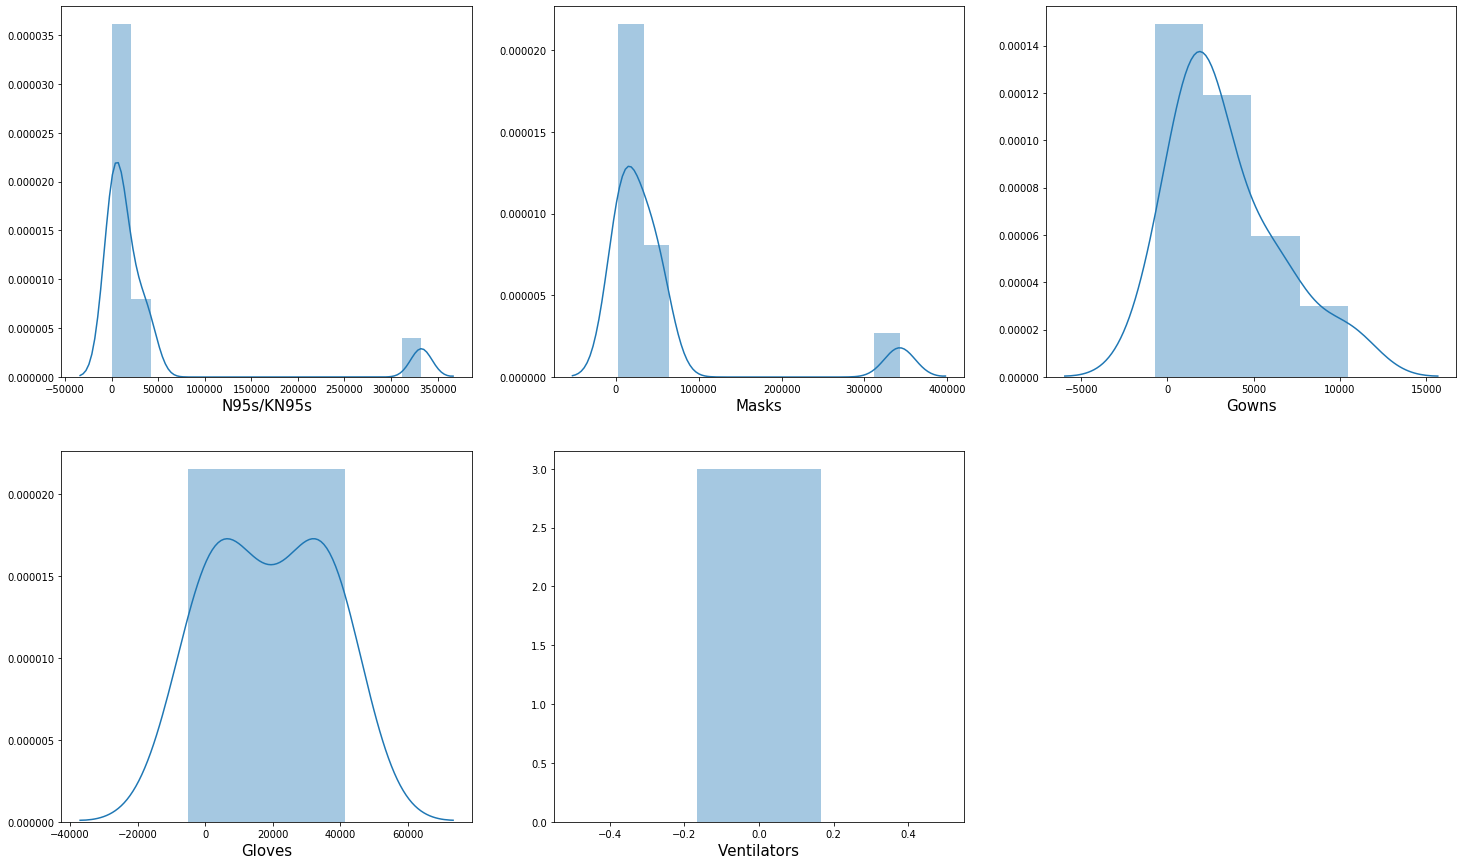

In [33]:
WM = df.loc[df['Region']=='Western Massachusetts']
WM_CC = WM.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    WM_CC['{} %'.format(category)] = WM_CC[category]/WM_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(WM_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
WM_CC

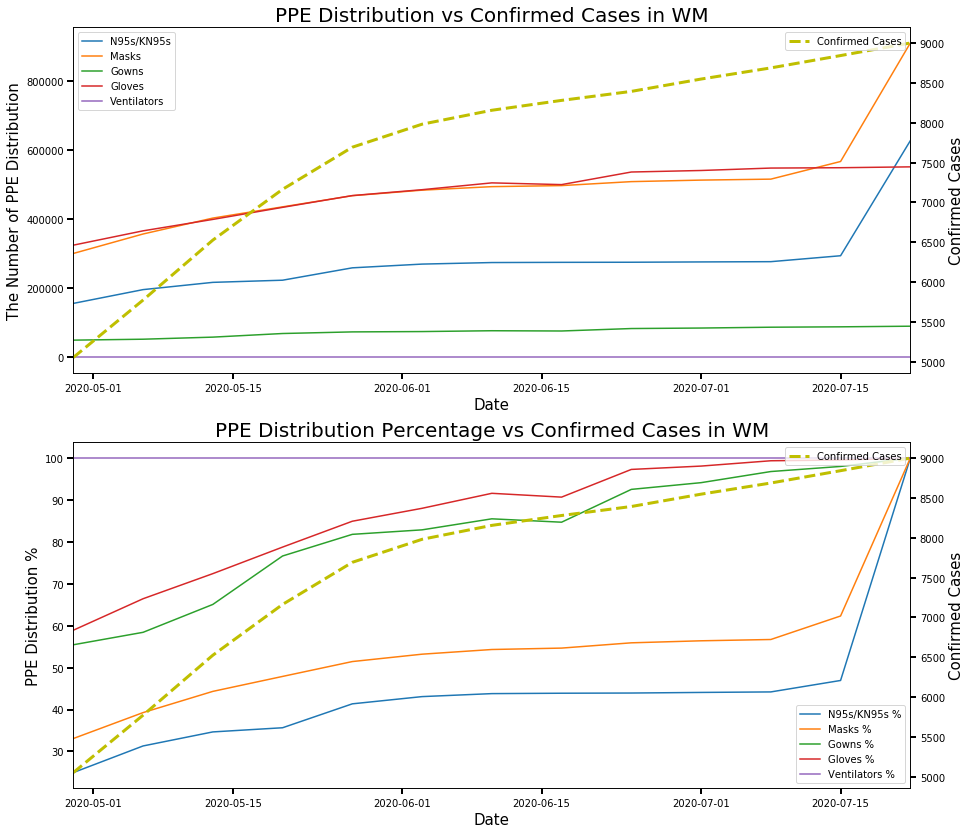

In [34]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=WM_CC)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in WM', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=WM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=WM_CC)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in WM', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=WM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [35]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    WM_CC['{} Ratio 1'.format(category)] = WM_CC[category]/WM_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
WM_CC['Confirmed Cases(ma1)'] = WM_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
WM_CC.iloc[0,-1] = (3763+5052) / 2
for category in categories:
    WM_CC['{} Ratio 2'.format(category)] = WM_CC[category]/WM_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
WM_CC['Confirmed Cases(ma2)'] = WM_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    WM_CC['{} Ratio 3'.format(category)] = WM_CC[category]/WM_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
WM_CC['Confirmed Cases(ma3)'] = WM_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
WM_CC.iloc[0,-1] = (3763+5052+5773)/3
for category in categories:
    WM_CC['{} Ratio 4'.format(category)] = WM_CC[category]/WM_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    WM_CC['{} Ratio 5'.format(category)] = WM_CC[category].diff()/WM_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    WM_CC['{} Ratio 6'.format(category)] = WM_CC[category].diff()/WM_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
WM_CC

Time                 Region  N95s/KN95s     Masks    Gowns  \
185 2020-04-29  Western Massachusetts    156323.0  300642.0  50128.0   
192 2020-05-06  Western Massachusetts    196135.0  356892.0  52813.0   
199 2020-05-13  Western Massachusetts    217121.0  402897.0  58829.0   
206 2020-05-20  Western Massachusetts    223347.0  435347.0  69279.0   
213 2020-05-27  Western Massachusetts    259107.0  467597.0  73949.0   
214 2020-06-03  Western Massachusetts    269912.0  483597.0  74919.0   
215 2020-06-10  Western Massachusetts    274382.0  493747.0  77299.0   
216 2020-06-17  Western Massachusetts    274972.0  496797.0  76569.0   
217 2020-06-24  Western Massachusetts    275262.0  508247.0  83649.0   
218 2020-07-01  Western Massachusetts    276162.0  512647.0  85099.0   
219 2020-07-08  Western Massachusetts    276922.0  515447.0  87499.0   
220 2020-07-15  Western Massachusetts    294047.0  566447.0  88599.0   
221 2020-07-22  Western Massachusetts    626547.0  908947.0  90399.0   

       Gloves  Ventilators  Confirmed Cases  Hospitalized Total  \
185  324630.0         60.0           5052.0               254.0   
192  366030.0         60.0           5773.0               236.0   
199  399030.0         60.0           6526.0               214.0   
206  433930.0         60.0           7164.0               173.0   
213  467930.0         60.0           7693.0               142.0   
214  484930.0         60.0           7982.0               113.0   
215  504643.0         60.0           8157.0                81.0   
216  499630.0         60.0           8281.0                78.0   
217  536043.0         60.0           8394.0                42.0   
218  540443.0         60.0           8549.0                53.0   
219  547443.0         60.0           8689.0                45.0   
220  548443.0         60.0           8844.0                38.0   
221  550943.0         60.0           9002.0                47.0   

     Hospitalized ICU  N95s/KN95s %     Masks %     Gowns %    Gloves %  \
185              40.0     24.949924   33.075856   55.451941   58.922611   
192              43.0     31.304116   39.264336   58.422106   66.437000   
199              44.0     34.653585   44.325687   65.077047   72.426730   
206              38.0     35.647286   47.895752   76.636910   78.761324   
213              34.0     41.354759   51.443814   81.802896   84.932561   
214              16.0     43.079290   53.204092   82.875917   88.018180   
215              15.0     43.792724   54.320769   85.508689   91.596227   
216              13.0     43.886891   54.656322   84.701158   90.686332   
217               7.0     43.933177   55.916022   92.533103   97.295546   
218               3.0     44.076821   56.400098   94.137103   98.094177   
219               7.0     44.198121   56.708147   96.792000   99.364726   
220               7.0     46.931356   62.319035   98.008828   99.546233   
221               6.0    100.000000  100.000000  100.000000  100.000000   

     Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  Gowns Ratio 1  \
185          100.0           30.942795      59.509501       9.922407   
192          100.0           33.974537      61.820890       9.148276   
199          100.0           33.270150      61.737205       9.014557   
206          100.0           31.176298      60.768705       9.670436   
213          100.0           33.680879      60.782140       9.612505   
214          100.0           33.815084      60.585943       9.385993   
215          100.0           33.637612      60.530465       9.476401   
216          100.0           33.205168      59.992392       9.246347   
217          100.0           32.792709      60.548844       9.965332   
218          100.0           32.303427      59.965727       9.954264   
219          100.0           31.870411      59.321786      10.070089   
220          100.0           33.248191      64.048734      10.017978   
221          100.0           69.600866     100.971673      10.042102   

  

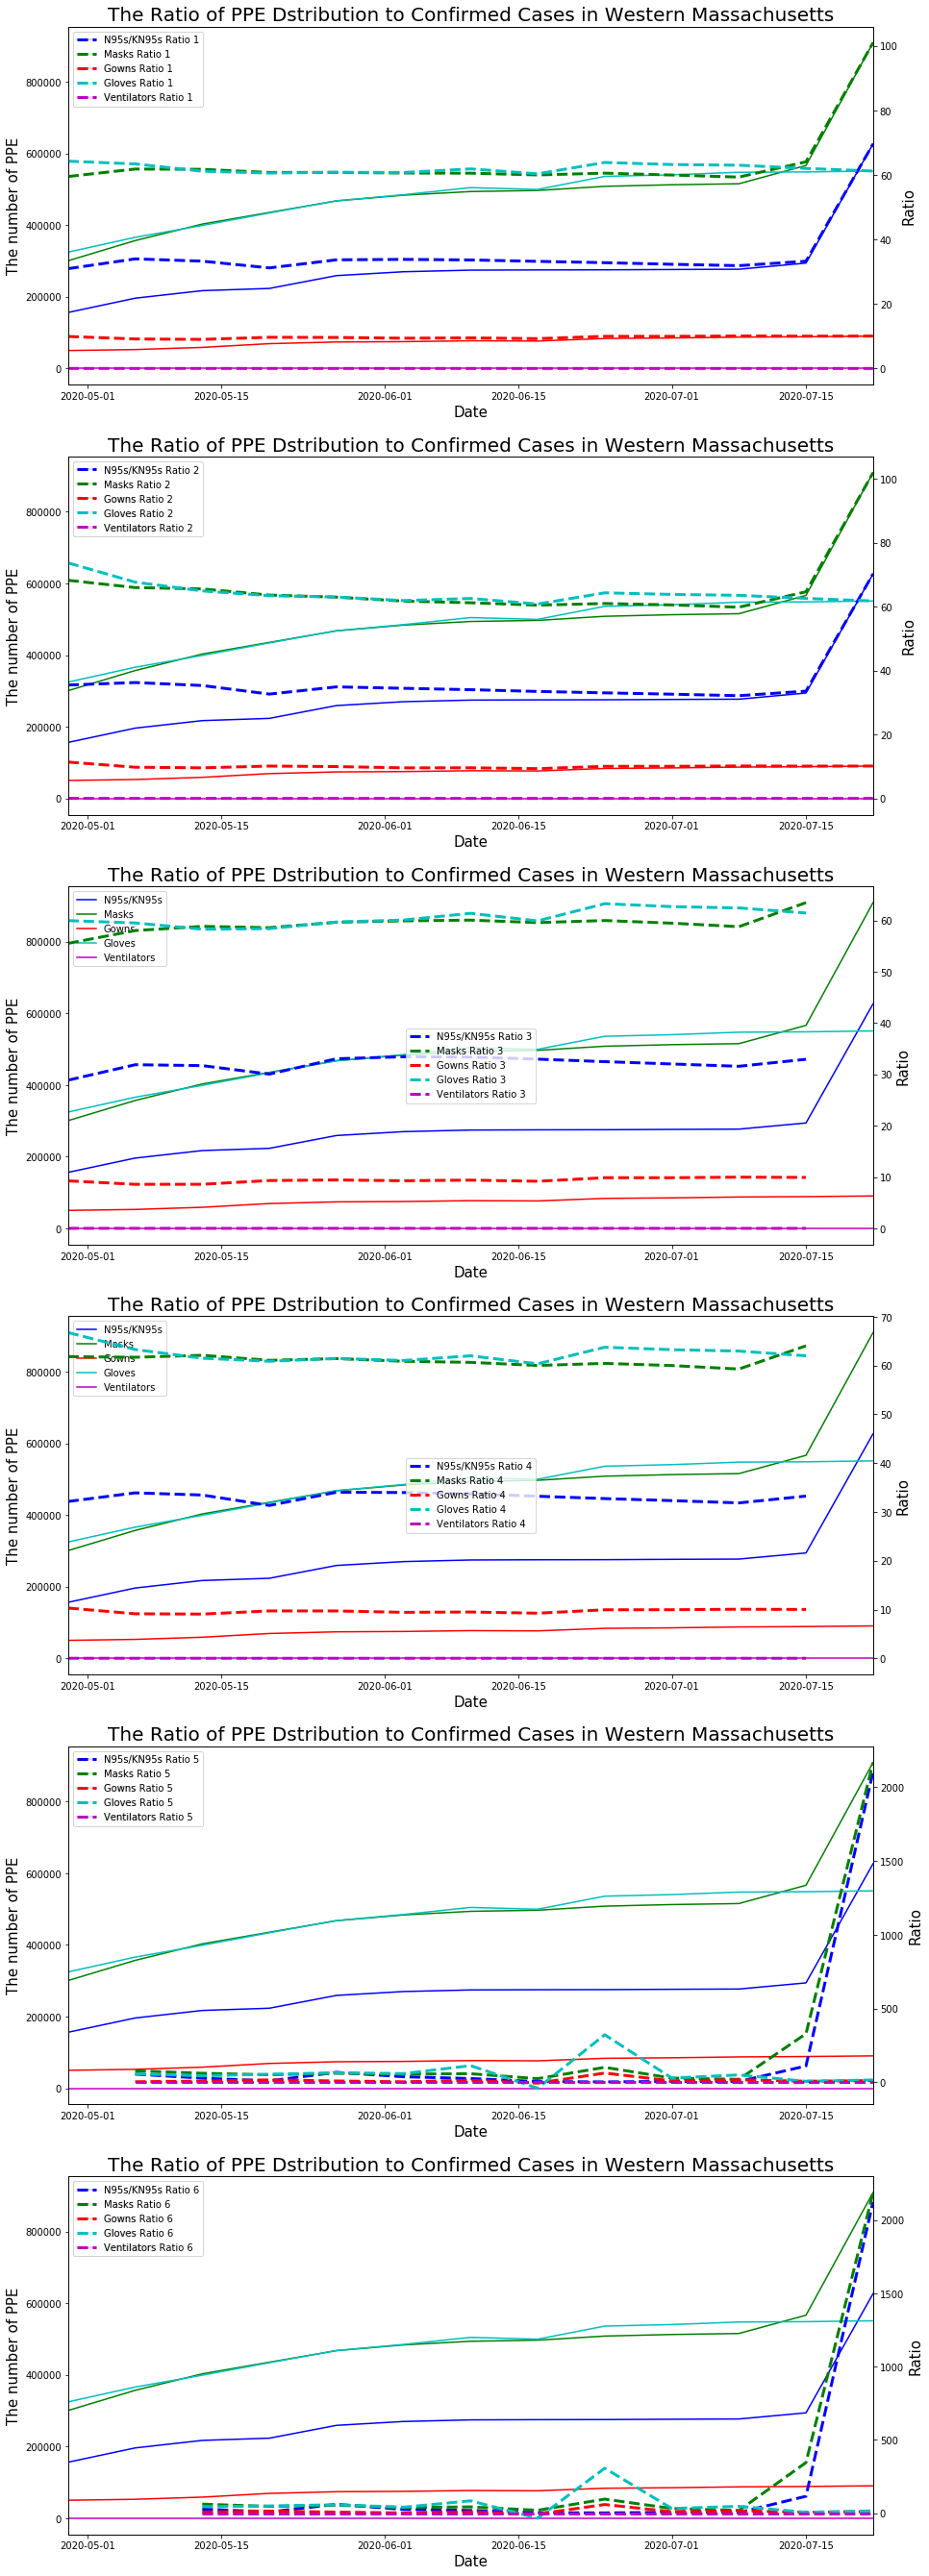

In [36]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=WM_CC, color=color[categories.index(category)])
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Western Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=WM_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

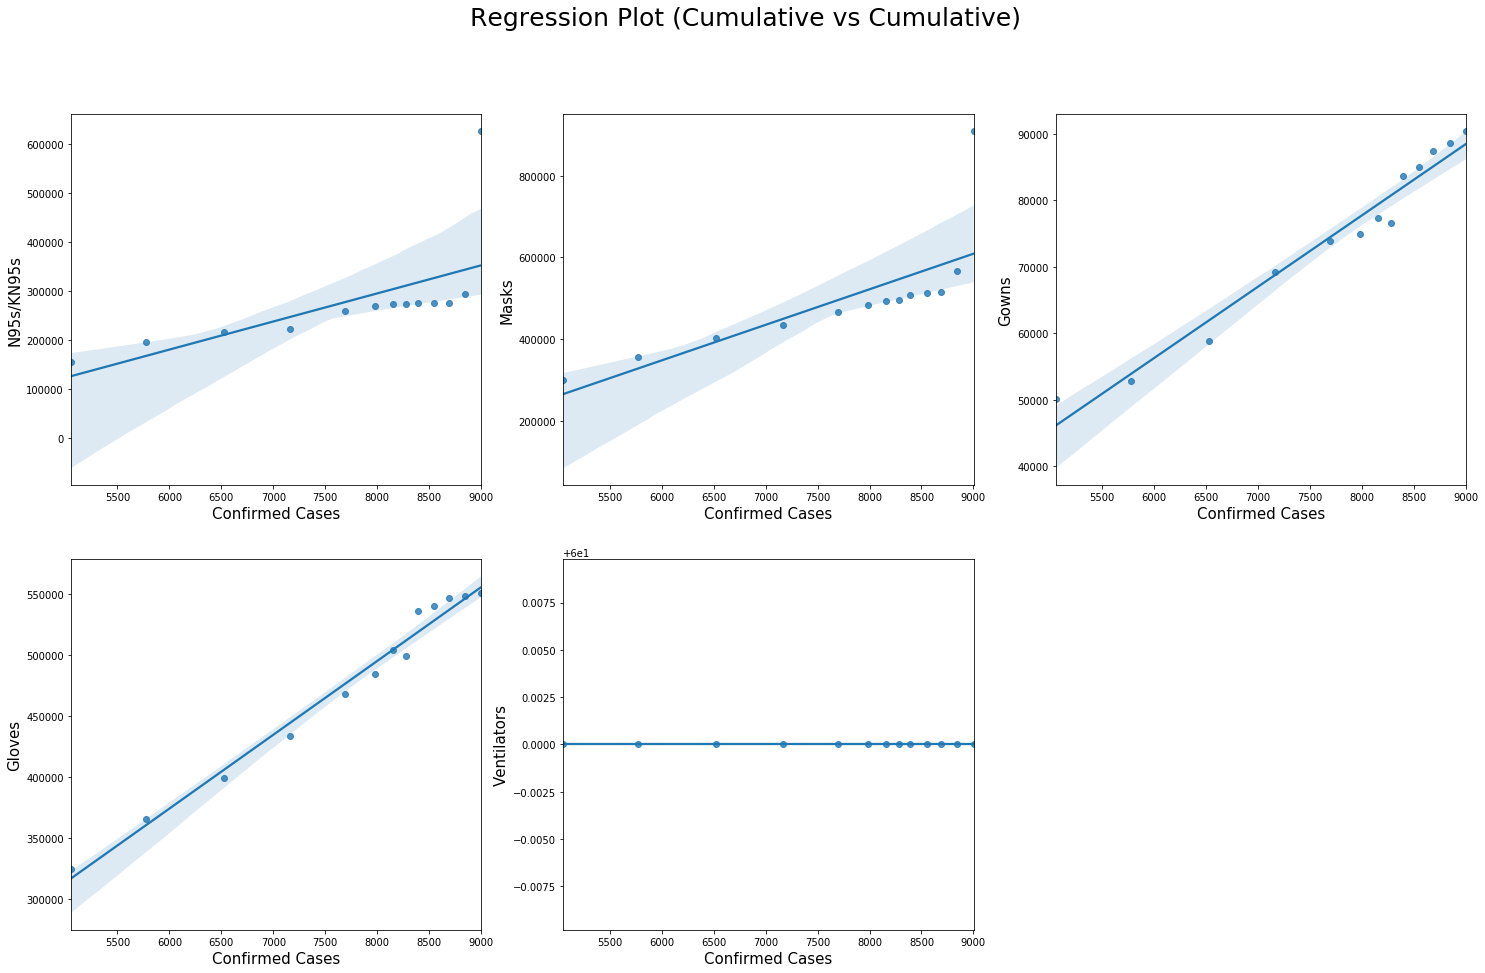

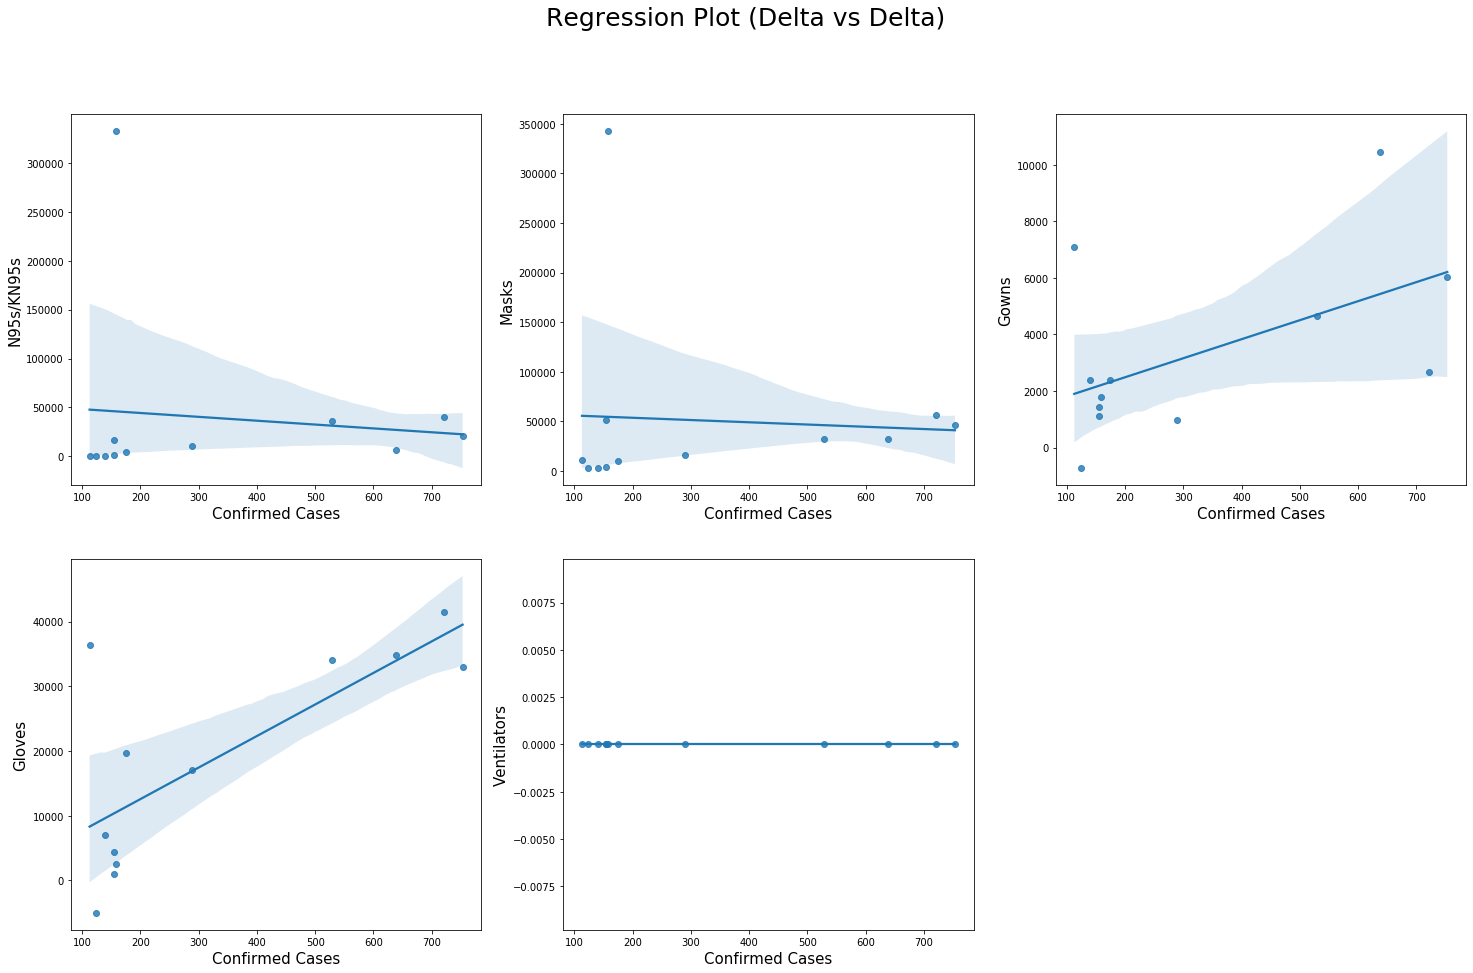

In [37]:
for category in categories:
    WM_CC['{} delta'.format(category)] = WM_CC[category].diff()
    WM_CC['Confirmed Cases delta'] = WM_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=WM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=WM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [38]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = WM_CC[category]
    X[categories.index(category)] = WM_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     7.250
Date:                Fri, 24 Jul 2020   Prob (F-statistic):             0.0209
Time:                        23:44:07   Log-Likelihood:                -165.77
No. Observations:                  13   AIC:                             335.5
Df Residuals:                      11   BIC:                             336.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.627e+05   1.66e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Massachusetts

In [39]:
MA = df.loc[df['Region']=='Massachusetts']
MA_CC = MA.drop(['Hospitalized Total', 'Hospitalized ICU'], axis=1).dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    MA_CC['{} %'.format(category)] = MA_CC[category]/MA_CC[category].iloc[-1] * 100
    
# fig, axes = plt.subplots(2, 3, figsize=(25,15))
# for ax, category in zip(axes.flatten(), categories):
#     sns.distplot(MA_CC[category].diff(), ax=ax)
#     ax.set_xlabel(category, fontsize=15)
# fig.delaxes(axes[1,2])
MA_CC

Time         Region  N95s/KN95s      Masks     Gowns     Gloves  \
259 2020-04-29  Massachusetts    990826.0  1863412.0  285795.0  3987284.0   
266 2020-05-06  Massachusetts   1246197.0  2290427.0  340057.0  5273534.0   
273 2020-05-13  Massachusetts   1385499.0  2744148.0  411454.0  6083122.0   
280 2020-05-20  Massachusetts   1481001.0  2951030.0  476763.0  6643694.0   
287 2020-05-27  Massachusetts   1713615.0  3154780.0  576570.0  7097694.0   
288 2020-06-03  Massachusetts   1784126.0  3290580.0  608770.0  7618366.0   
289 2020-06-10  Massachusetts   2544530.0  3469230.0  638660.0  7888596.0   
290 2020-06-17  Massachusetts   2556595.0  3434680.0  647490.0  7839666.0   
291 2020-06-24  Massachusetts   4388525.0  3538480.0  666890.0  8271946.0   
292 2020-07-01  Massachusetts   4409365.0  4007230.0  678510.0  8867546.0   
293 2020-07-08  Massachusetts   4437140.0  4041230.0  691495.0  8922946.0   
294 2020-07-15  Massachusetts   4530795.0  4689430.0  705322.0  9469546.0   
295 2020-07-22  Massachusetts   7447255.0  6733830.0  714422.0  9590446.0   

     Ventilators  Confirmed Cases  N95s/KN95s %     Masks %     Gowns %  \
259        675.0          60265.0     13.304580   27.672394   40.003667   
266        675.0          72025.0     16.733642   34.013734   47.598898   
273        675.0          80497.0     18.604157   40.751667   57.592571   
280        675.0          88970.0     19.886535   43.823946   66.734087   
287        679.0          94220.0     23.010022   46.849713   80.704402   
288        679.0          97964.0     23.956827   48.866395   85.211542   
289        679.0         100158.0     34.167354   51.519418   89.395343   
290        679.0         101654.0     34.329360   51.006337   90.631308   
291        679.0         102762.0     58.928088   52.547807   93.346789   
292        679.0         103858.0     59.207923   59.508927   94.973279   
293        679.0         104961.0     59.580879   60.013841   96.790832   
294        679.0         106128.0     60.838457   69.639863   98.726243   
295        679.0         107413.0    100.000000  100.000000  100.000000   

       Gloves %  Ventilators %  
259   41.575585      99.410898  
266   54.987370      99.410898  
273   63.428979      99.410898  
280   69.274088      99.410898  
287   74.007966     100.000000  
288   79.437036     100.000000  
289   82.254736     100.000000  
290   81.744540     100.000000  
291   86.251943     100.000000  
292   92.462290     100.000000  
293   93.039948     100.000000  
294   98.739370     100.000000  
295  100.000000     100.000000

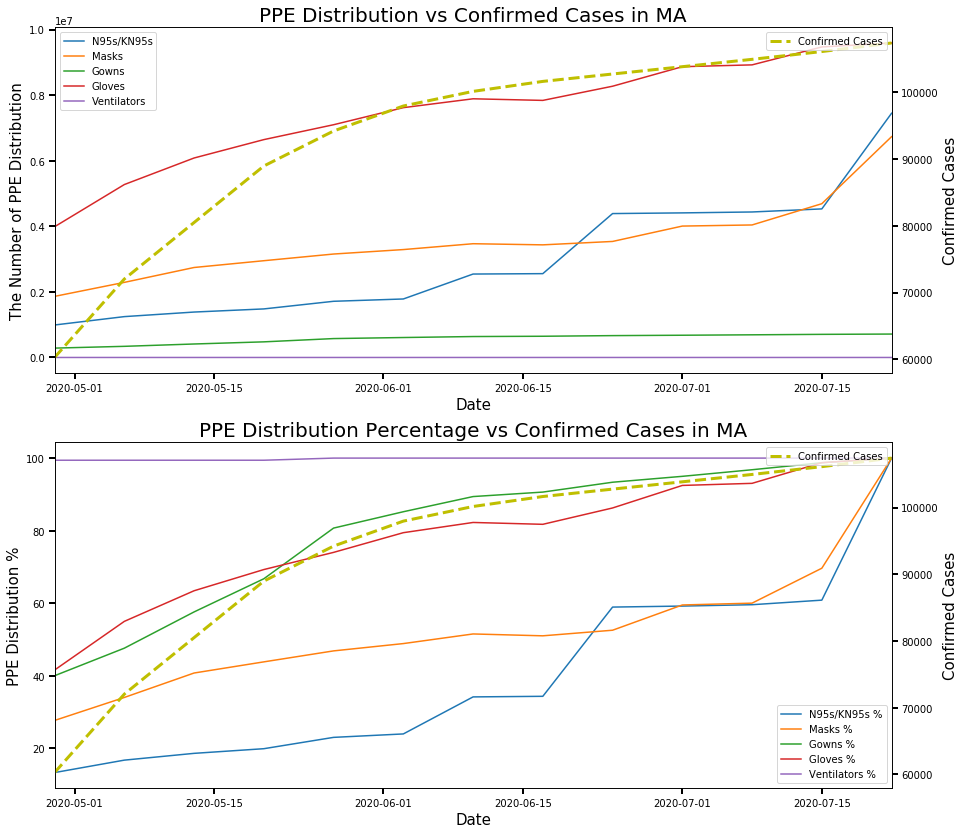

In [40]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=MA_CC)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in MA', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=MA_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=MA_CC)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in MA', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=MA_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [41]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    MA_CC['{} Ratio 1'.format(category)] = MA_CC[category]/MA_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
MA_CC['Confirmed Cases(ma1)'] = MA_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
MA_CC.iloc[0,-1] = (42944+60265) / 2
for category in categories:
    MA_CC['{} Ratio 2'.format(category)] = MA_CC[category]/MA_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
MA_CC['Confirmed Cases(ma2)'] = MA_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    MA_CC['{} Ratio 3'.format(category)] = MA_CC[category]/MA_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
MA_CC['Confirmed Cases(ma3)'] = MA_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
MA_CC.iloc[0,-1] = (42944+60265+72025)/3
for category in categories:
    MA_CC['{} Ratio 4'.format(category)] = MA_CC[category]/MA_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    MA_CC['{} Ratio 5'.format(category)] = MA_CC[category].diff()/MA_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    MA_CC['{} Ratio 6'.format(category)] = MA_CC[category].diff()/MA_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
MA_CC

Time         Region  N95s/KN95s      Masks     Gowns     Gloves  \
259 2020-04-29  Massachusetts    990826.0  1863412.0  285795.0  3987284.0   
266 2020-05-06  Massachusetts   1246197.0  2290427.0  340057.0  5273534.0   
273 2020-05-13  Massachusetts   1385499.0  2744148.0  411454.0  6083122.0   
280 2020-05-20  Massachusetts   1481001.0  2951030.0  476763.0  6643694.0   
287 2020-05-27  Massachusetts   1713615.0  3154780.0  576570.0  7097694.0   
288 2020-06-03  Massachusetts   1784126.0  3290580.0  608770.0  7618366.0   
289 2020-06-10  Massachusetts   2544530.0  3469230.0  638660.0  7888596.0   
290 2020-06-17  Massachusetts   2556595.0  3434680.0  647490.0  7839666.0   
291 2020-06-24  Massachusetts   4388525.0  3538480.0  666890.0  8271946.0   
292 2020-07-01  Massachusetts   4409365.0  4007230.0  678510.0  8867546.0   
293 2020-07-08  Massachusetts   4437140.0  4041230.0  691495.0  8922946.0   
294 2020-07-15  Massachusetts   4530795.0  4689430.0  705322.0  9469546.0   
295 2020-07-22  Massachusetts   7447255.0  6733830.0  714422.0  9590446.0   

     Ventilators  Confirmed Cases  N95s/KN95s %     Masks %     Gowns %  \
259        675.0          60265.0     13.304580   27.672394   40.003667   
266        675.0          72025.0     16.733642   34.013734   47.598898   
273        675.0          80497.0     18.604157   40.751667   57.592571   
280        675.0          88970.0     19.886535   43.823946   66.734087   
287        679.0          94220.0     23.010022   46.849713   80.704402   
288        679.0          97964.0     23.956827   48.866395   85.211542   
289        679.0         100158.0     34.167354   51.519418   89.395343   
290        679.0         101654.0     34.329360   51.006337   90.631308   
291        679.0         102762.0     58.928088   52.547807   93.346789   
292        679.0         103858.0     59.207923   59.508927   94.973279   
293        679.0         104961.0     59.580879   60.013841   96.790832   
294        679.0         106128.0     60.838457   69.639863   98.726243   
295        679.0         107413.0    100.000000  100.000000  100.000000   

       Gloves %  Ventilators %  N95s/KN95s Ratio 1  Masks Ratio 1  \
259   41.575585      99.410898           16.441152      30.920302   
266   54.987370      99.410898           17.302284      31.800444   
273   63.428979      99.410898           17.211809      34.090065   
280   69.274088      99.410898           16.646072      33.168821   
287   74.007966     100.000000           18.187381      33.483125   
288   79.437036     100.000000           18.212057      33.589686   
289   82.254736     100.000000           25.405160      34.637573   
290   81.744540     100.000000           25.149970      33.787947   
291   86.251943     100.000000           42.705718      34.433740   
292   92.462290     100.000000           42.455709      38.583739   
293   93.039948     100.000000           42.274178      38.502206   
294   98.739370     100.000000           42.691797      44.186548   
295  100.000000     100.000000           69.332902      62.691015   

     Gowns Ratio 1  Gloves Ratio 1  Ventilators Ratio 1  Confirmed Cases(ma1)  \
259       4.742305       66.162516             0.011201               51604.5   
266       4.721375       73.218105             0.009372               66145.0   
273       5.111420       75.569549             0.008385               76261.0   
280       5.358694       74.673418             0.007587               84733.5   
287       6.119401       75.331076             0.007207               91595.0   
288       6.214222       77.766996             0.006931               96092.0   
289       6.376525       78.761517             0.006779               99061.0   
290       6.369548       77.121077             0.006680              100906.0   
291       6.489656       80.496156             0.006608              102208.0   
292       6.533055       85.381444             0.006538              103310.0   
293       6.588114    

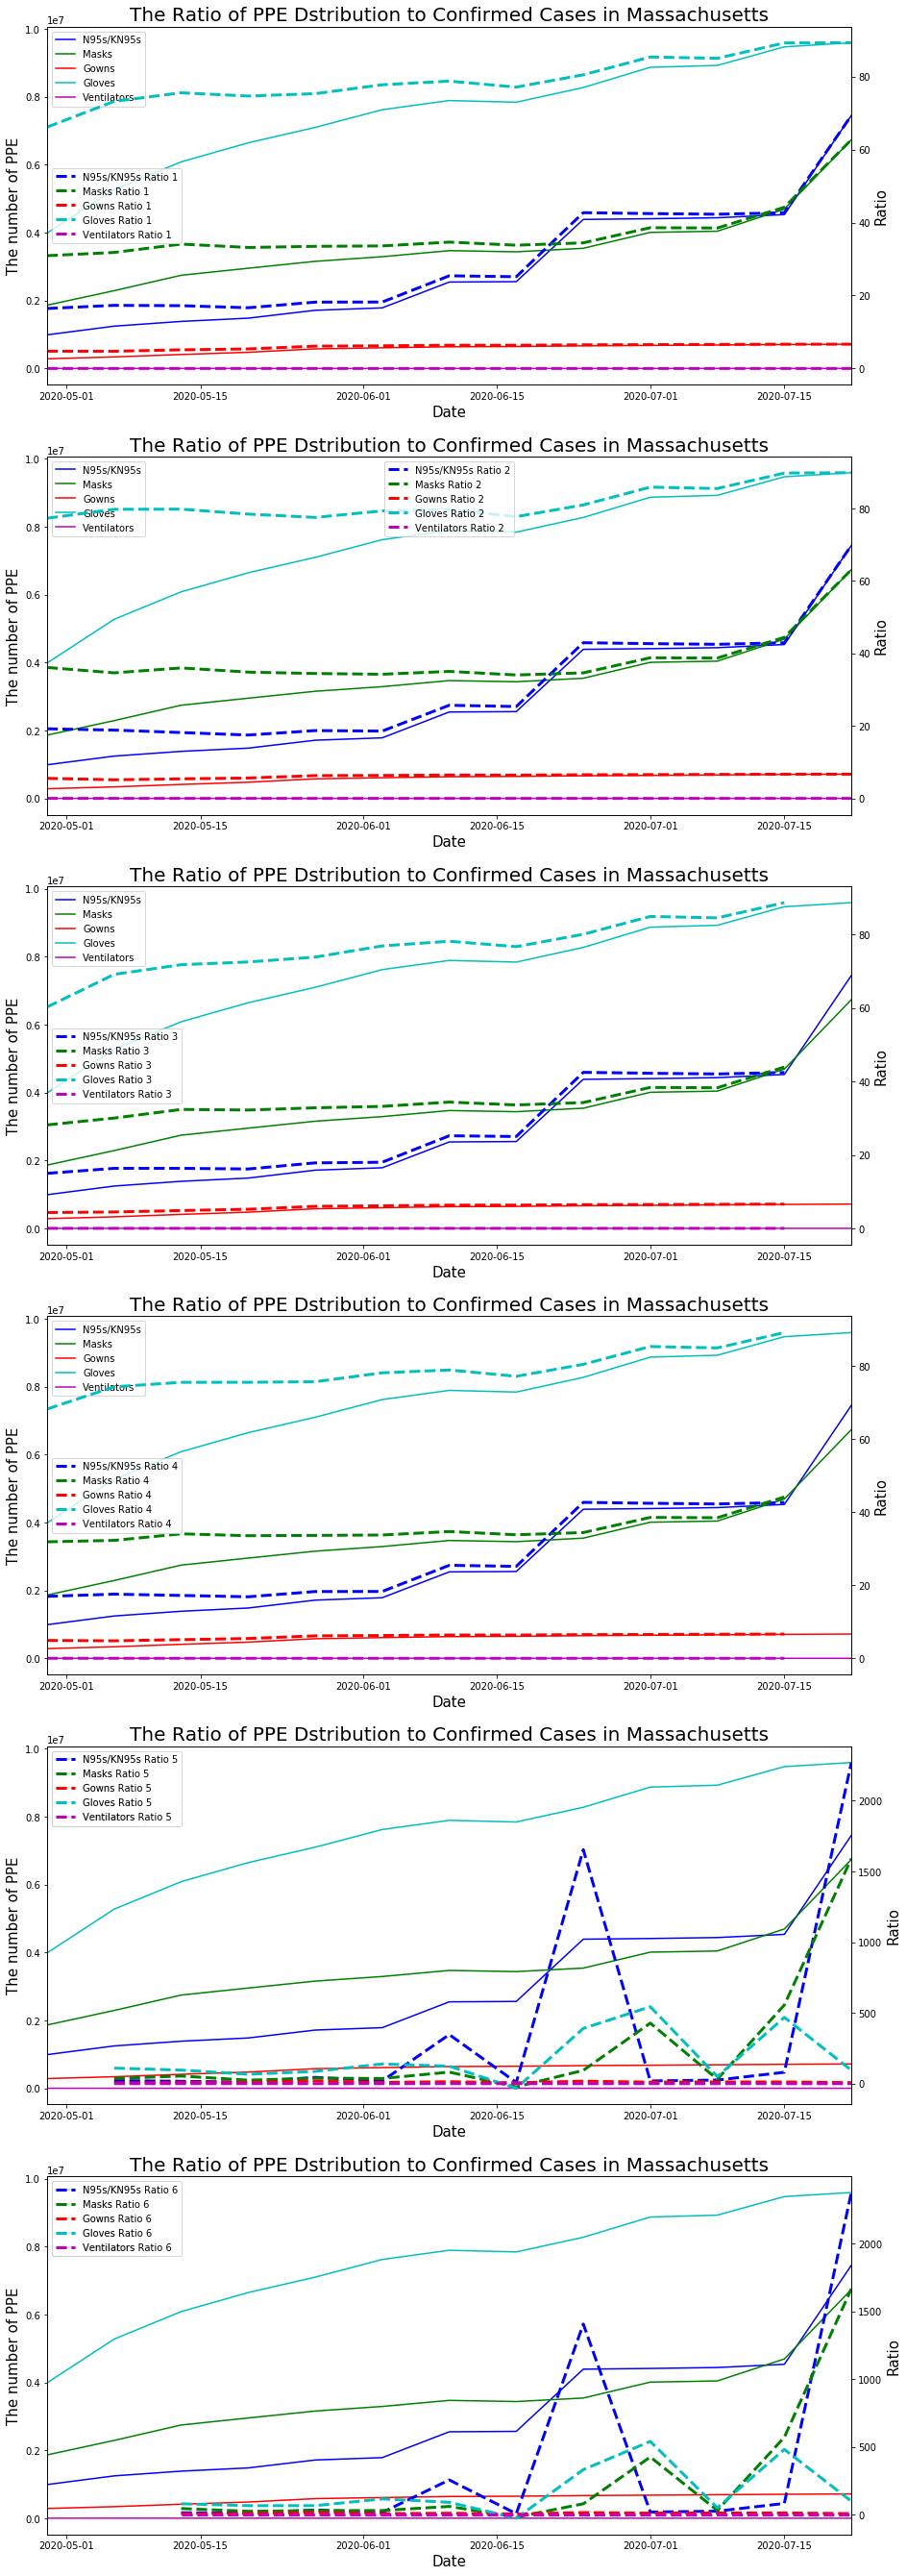

In [42]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=MA_CC, color=color[categories.index(category)])
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 7, 22)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=MA_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

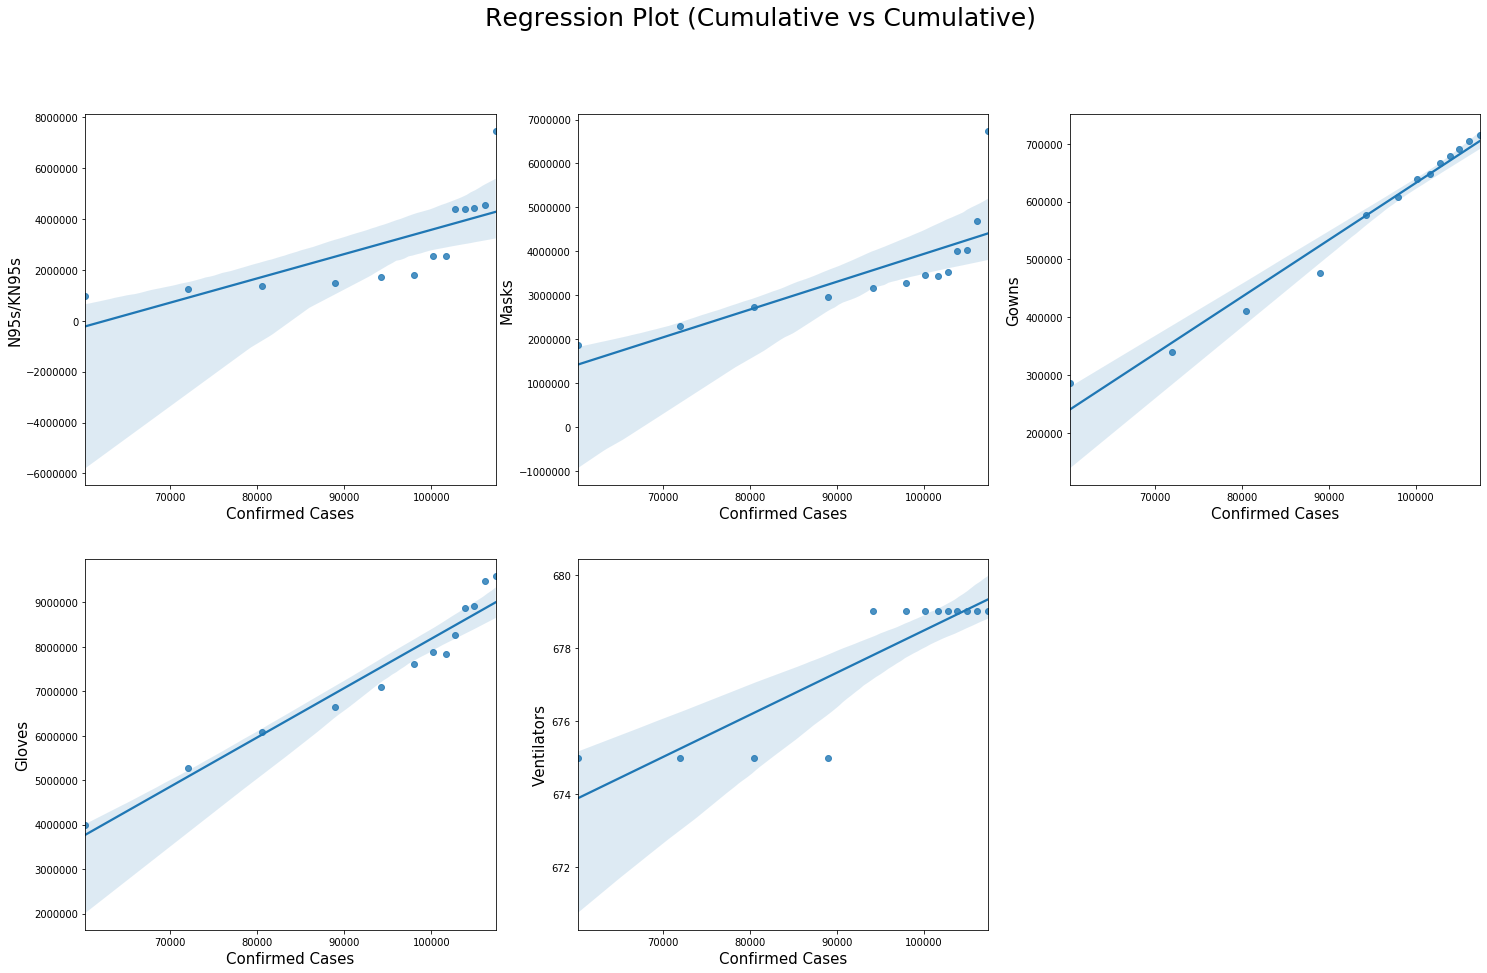

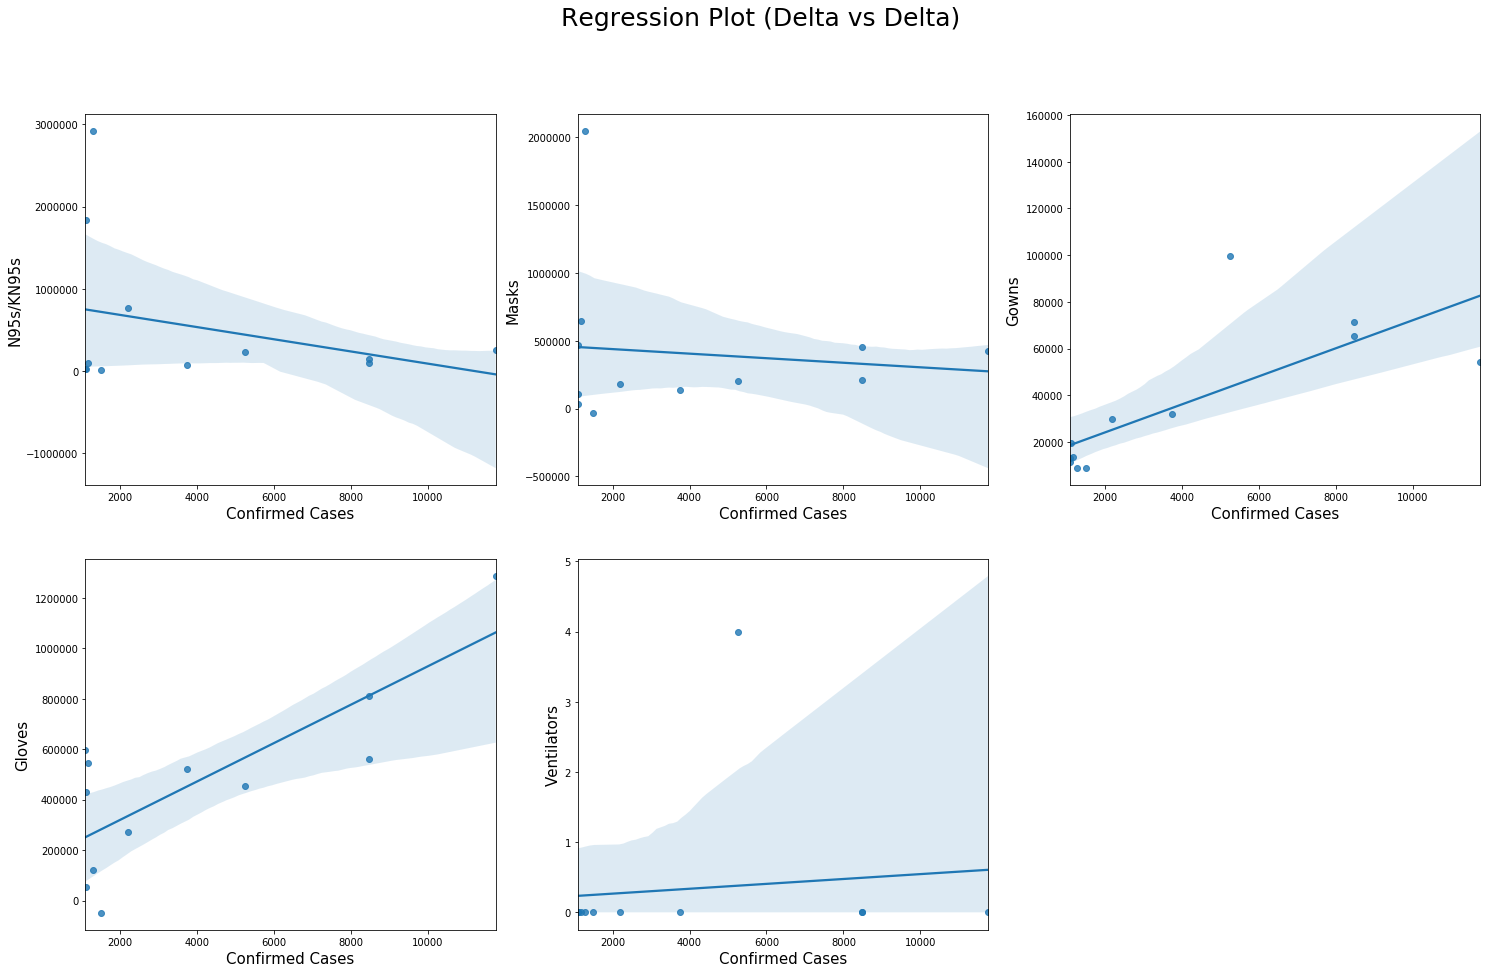

In [43]:
for category in categories:
    MA_CC['{} delta'.format(category)] = MA_CC[category].diff()
    MA_CC['Confirmed Cases delta'] = MA_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=MA_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=MA_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [44]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = MA_CC[category]
    X[categories.index(category)] = MA_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     12.62
Date:                Fri, 24 Jul 2020   Prob (F-statistic):            0.00453
Time:                        23:44:19   Log-Likelihood:                -200.96
No. Observations:                  13   AIC:                             405.9
Df Residuals:                      11   BIC:                             407.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.969e+06   2.55e+06     